# **Introduction au Machine Learning [en utilisant JAX]**


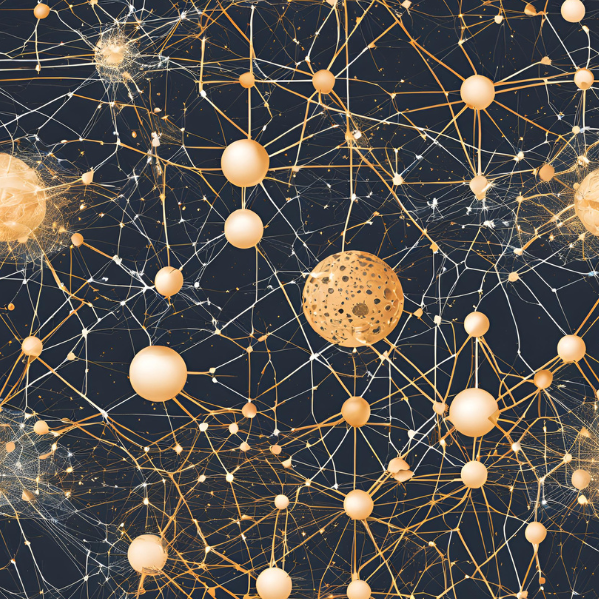


<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Intro_to_ML_using_JAX/Introduction_to_ML_using_JAX_French.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open
 In Colab"/></a>

© Deep Learning Indaba 2024. Apache License 2.0.

**Auteurs:** Kale-ab Tessera, Geraud Nangue Tasse, Oluwabamigbe Oni

**Réviseurs:**

**Introduction:**

Dans ce tutoriel, nous allons découvrir certains des concepts de haut niveau derrière l'apprentissage automatique (<font color='grey'>`ANGLAIS`</font> machine learning, ML) et les bases de JAX, une bibliothèque de calcul numérique que nous utiliserons pour nos travaux pratiques. Enfin, nous aborderons les fondamentaux de l'apprentissage supervisé (<font color='grey'>`ANGLAIS`</font> suppervised learning), de la régression linéaire (linear regression) jusqu'aux réseaux de neurones (<font color='grey'>`ANGLAIS`</font> neural networks), en apprenant les principes de l'optimisation en cours de route.

**Sujets:**

Contenu: <font color='green'>`Calcul Numérique`</font> , <font color='orange'>`Apprentissage Supervisé`</font>
Niveau: <font color='grey'>`Débutant`</font>


**Objectifs/Apprentissages:**

- Comprendre les concepts de haut niveau en ML - données, modèle et apprentissage.
- Obtenir une vue d'ensemble de la terminologie moderne du ML.
- Apprendre les bases de JAX et comment l'utiliser.
- Découvrir la régression linéaire et les réseaux de neurones, et comment les implémenter en JAX.

**Prérequis:**

- Connaissances de base en [NumPy](https://github.com/numpy/numpy).
- Connaissances de base en [programmation fonctionnelle](https://fr.wikipedia.org/wiki/Programmation_fonctionnelle).

**Plan:**

>[Introduction au ML [en utilisant JAX]](#scrollTo=lM2waCJJYlzD)

>>[Installation et Imports](#scrollTo=6EqhIg1odqg0)

>[Partie 1 - Qu'est-ce que le Machine Learning - 25 minutes ⏰](#scrollTo=cMhBHaeYEn9t)

>>[💻Introduction et Motivation](#scrollTo=OueV4gWwEn9u)

>>>[Est-ce un 1 ou un 7?](#scrollTo=OueV4gWwEn9u)

>>>[Qu'est-ce que le Machine Learning?](#scrollTo=DIe8aXmGrWEL)

>>[🔑 Composants Clés](#scrollTo=pR-gqkkOEn9w)

>>>[1.1 Données](#scrollTo=dpo6ISGOEn9x)

>>[1.2 Modèles](#scrollTo=S586n3hEEn9z)

>>[1.3 Apprentissage](#scrollTo=6BFPS0PSEgU6)

>>[1.4 Types de problèmes de machine learning](#scrollTo=Y71M5dCdEn9z)

>>[1.5 Terminologie Moderne](#scrollTo=_ssdwdCLEn9z)

>>>[Terminologie Générale](#scrollTo=_ssdwdCLEn9z)

>>>[Terminologie de Modélisation Générative](#scrollTo=_ssdwdCLEn9z)

>[Partie 2 - Bases de JAX - 25 minutes ⏰](#scrollTo=Enx0WUr8tIPf)

>>[2.1 Jax 🤝 NumPy](#scrollTo=xoPRK7mXTRct)

>>>[Similarités ✅](#scrollTo=0n3jH8LpJIrd)

>>>[Différences ❌](#scrollTo=Nq5R2c3mJMSa)

>>>>[Les tableaux Jax sont immuables (ils ne peuvent pas être modifiés après leur création).](#scrollTo=ZTYv8INhRRDX)

>>>>[Aléatoire dans NumPy vs JAX](#scrollTo=oAH4c_smdGQU)

>>[2.2 Primitives de base de Jax - jit et grad](#scrollTo=6jowfM6eTv73)

>>>[jit - Compilation Juste-à-Temps](#scrollTo=48GKzQnrCxMe)

>>>[grad - Différentiation Automatique](#scrollTo=sxYQSmKdGpgt)

>>[2.3 Auto-vectorisation - vmap](#scrollTo=N9JkQP9xVAGi)

>[Partie 3 - Bases du ML supervisé (Régression et Réseaux de Neurones) - 50 minutes ⏰](#scrollTo=aB0503xgmSFh)

>>[3.1 Régression Linéaire - 25 minutes ⏰ - 📈 Débutant](#scrollTo=XrWSN-zaWAhJ)

>>>[Exemple de Régression - Prix des Maisons](#scrollTo=AcyM6XRj1cDz)

>>>[Fonction de perte et optimisation](#scrollTo=hNJgESq_LP4R)

>>>[Entraîner le modèle en utilisant Jax](#scrollTo=q9dQh9DdLYPE)

>>>[Réseaux de neurones](#scrollTo=XStsgHB2MarI)

>>>>[Fonctions d'activation](#scrollTo=fkpytbBzMvMj)

>>>>[Construire un modèle de réseau de neurones simple avec Jax](#scrollTo=3Wrxt2orM7sk)

>>[3.2 Régression Logistique - 25 minutes ⏰ - 📈 Intermédiaire](#scrollTo=wMgxJU0TOX6O)

>>>>[Logits et fonction d'activation sigmoïde](#scrollTo=SE1L3rmaO4UP)

>>>>[Extension à la classification multi-classes](#scrollTo=HjQNjDC2cG2t)

>>>>[Construire un réseau de neurones simple pour la classification](#scrollTo=EcXXE56hPOhK)

>>>>[Entraîner le modèle](#scrollTo=GcSvlekHPWxW)

>>>>[Évaluer le modèle](#scrollTo=sGPvmGWkP1fT)

>[Conclusion](#scrollTo=fV3YG7QOZD-B)

>[Annexe:](#scrollTo=XrRoSqlxfi7f)

>>[Dérivation des dérivées partielles pour l'exercice 2.4.](#scrollTo=9OH9H7ndfuyQ)

>[Feedback](#scrollTo=o1ndpYE50BpG)




**Avant de commencer:**

Pour ce TP, vous aurez besoin d'utiliser un GPU pour accélérer l'entraînement. Pour ce faire, allez dans le menu "Runtime" (Exécution) dans Colab, sélectionnez "Change runtime type" (Modifier le type d'exécution) puis dans le menu contextuel, choisissez "GPU" dans la case "Hardware accelerator" (Accélérateur matériel).



## Installation et Imports


In [ ]:
## Installer et importer tout ce qui est requis. Capture masque la sortie de la cellule.
# @title Installer et importer les paquets nécessaires. (Exécuter la cellule)

import subprocess
import os

# Basé sur https://stackoverflow.com/questions/67504079/how-to-check-if-an-nvidia-gpu-is-available-on-my-system
try:
    subprocess.check_output('nvidia-smi')
    print("un GPU est connecté.")
except Exception:
    # TPU ou CPU
    if "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
      print("Un TPU est connecté.")
      import jax.tools.colab_tpu
      jax.tools.colab_tpu.setup_tpu()
    else:
      print("Seul un accélérateur CPU est connecté.")
      # x8 cpu devices - nombre de périphériques hôtes (émulés)
      os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=8"
import jax
import jax.numpy as jnp  # jnp = Jax NumPy
from jax import grad, jit, vmap, pmap

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# @title Fonctions d'Aide. (Exécuter la cellule)
import copy
from typing import Dict


def plot_performance(data: Dict, title: str):  # (data = données, title = titre)
    runs = list(data.keys())  # (runs = exécutions)
    time = list(data.values())  # (time = temps)

    # création du diagramme en barres
    plt.bar(runs, time, width=0.35)

    plt.xlabel("Implémentation")
    plt.ylabel("Temps moyen pris (en s)")
    plt.title(title)
    plt.show()

    best_perf_key = min(data, key=data.get)  # (best_perf_key = clé de la meilleure performance)
    all_runs_key = copy.copy(runs)

    # all_runs_key_except_best
    all_runs_key.remove(best_perf_key)

    for k in all_runs_key:
        print(
            f"{best_perf_key} était {round((data[k]/data[best_perf_key]),2)} fois plus rapide que {k} !!!"
        )

In [ ]:
# @title Vérifier le périphérique que vous utilisez (Exécuter la cellule)
print(f"Nombre de périphériques: {jax.device_count()}")
print(f" Périphériques: {jax.devices()}")

La cellule de texte ci-dessous crée une macro LaTeX à utiliser dans les équations mathématiques.

# **Partie 1 - Qu'est-ce que le Machine Learning** - 25 minutes ⏰


## 💻**Introduction et Motivation**

### Est-ce un 1 ou un 7?

Imaginez que vous devriez concevoir un système capable de détecter un texte donné à partir de l'écriture manuscrite des gens. Pourriez-vous coder cela à partir des principes fondamentaux?

Si vous y réfléchissez, ce problème est vraiment difficile! Même une version plus simple de ce problème, où vous n'avez qu'à identifier des chiffres, est assez complexe. Chaque entrée peut être l'un des 10 chiffres différents, et chaque chiffre peut être écrit de nombreuses façons différentes. Et quand c'est des nombres à plusieurs chiffres?

Si vous êtes bloqué, ne vous inquiétez pas, c'est un problème difficile à résoudre. L'idée clé pour résoudre ce problème est de savoir que même si les règles peuvent être difficiles, c'est-à-dire comment faire correspondre une image du chiffre 9 écrit à la main au chiffre 9, vous êtes capable de faire cette tâche vous-même. Vous pouvez regarder un chiffre écrit à la main et dire de quel chiffre il s'agit. Avec cette capacité, vous pouvez collecter un grand ensemble de données de chiffres manuscrits et étiqueter cet ensemble de données avec le bon chiffre. En utilisant cet ensemble de données, vous pouvez entraîner un modèle de machine learning à effectuer la tâche - la même tâche qui serait très difficile à réaliser en utilisant des règles spécifique.


**Exercice 1.1** Jouons à un jeu de devinettes de chiffres! Pouvez-vous identifier ces chiffres? Pensez-vous que ce soit difficile pour un ordinateur?


In [ ]:
## Cacher le code.
# @title Fonctions d'aide. (Exécuter la cellule)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from ipywidgets import interact, widgets
from IPython.display import display, HTML
import io

# Fonction pour afficher une image et obtenir l'entrée de l'utilisateur
def display_and_guess(x_train, y_train, question, options):  # (x_train = données d'entraînement, y_train = étiquettes d'entraînement, question = question posée, options = options possibles)
    idx = np.random.randint(0, len(x_train))  # (idx = index aléatoire)
    image = x_train[idx]
    label = y_train.iloc[idx]

    # Créer l'image
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(question, fontsize=12)

    # Convertir le graphique en image
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img = widgets.Image(value=buf.getvalue(), format='png')
    plt.close(fig)

    output = widgets.Output()

    def on_button_click(b):
        with output:
            output.clear_output()
            if b.description == str(label):
                display(HTML(f'<p style="color:green; font-size:12px;"><b>Correct! 🎉</b></p>'))
            else:
                display(HTML(f'<p style="color:red; font-size:12px;"><b>Incorrect. It was a \'{label}\'. 😔</b></p>'))

    # Créer des boutons dynamiquement en fonction des options fournies
    buttons = [widgets.Button(description=str(option), button_style='info', layout=widgets.Layout(width='40px')) for option in options]
    for button in buttons:
        button.on_click(on_button_click)

    return widgets.VBox([img, widgets.HBox(buttons), output])

def numbers_recognition_game(rounds=2):  # (rounds = nombre de manches)

    # Jouer au jeu pendant quelques manches
    display(HTML('<h1 style="text-align:center;">Jouons à un jeu de devinettes de chiffres !</h1>'))

    # Charger l'ensemble de données MNIST
    mnist = fetch_openml('mnist_784', version=1)
    X = mnist['data'].values.reshape(-1, 28, 28)
    y = mnist['target'].astype(int)

    # Préparer les ensembles de données pour '1' vs '7' et '0' vs '6'
    datasets = {
        "1 vs 7": (X[np.where((y == 1) | (y == 7))[0]], y.iloc[np.where((y == 1) | (y == 7))[0]]),
        "0 vs 6": (X[np.where((y == 0) | (y == 6))[0]], y.iloc[np.where((y == 0) | (y == 6))[0]])
    }

    for _ in range(rounds):
        row = []
        for question, (x_train, y_train) in datasets.items():
            options = [int(digit) for digit in question.split(" vs ")]
            row.append(display_and_guess(x_train, y_train, f"Est-ce un {question} ?", options))

        # Ajouter une troisième colonne avec une question aléatoire
        random_question = np.random.choice(list(datasets.keys()))
        x_train, y_train = datasets[random_question]
        options = [int(digit) for digit in random_question.split(" vs ")]
        row.append(display_and_guess(x_train, y_train, f"Est-ce un {random_question} ?", options))

        display(widgets.HBox(row))

    display(HTML('<h2 style="text-align:center;">Merci d\'avoir joué !</h2>'))

In [ ]:
numbers_recognition_game(rounds=2)

### Qu'est-ce que le Machine Learning ?

Le machine learning (ML) consiste à concevoir des algorithmes qui extraient automatiquement des informations utiles à partir de données ([mathématiques pour le machine learning](https://mml-book.github.io/)). Au lieu de programmer explicitement chaque règle, le ML permet à l'ordinateur d'apprendre à partir des données et de faire des prédictions ou de prendre des décisions basées sur ce qu'il a appris.

En ML, il y a trois composants principaux : les données, les modèles et l'apprentissage.


## 🔑 **Composants Clés**

- Données (Data): Il s'agit généralement d'une collection d'exemples à partir desquels nous voulons apprendre.
- Modèles (Models): Fonctions qui prennent des données en entrée et produisent des prédictions ou des décisions en sortie. Ces modèles sont contrôlés par des paramètres, qui sont comme des boutons réglables qui déterminent le comportement du modèle.
- Apprentissage (Learning): Le processus d'ajustement des paramètres du modèle pour améliorer ses performances sur une tâche spécifique.

### 1.1 **Données**

Le ML trouve des modèles dans les données, qui peuvent être sous forme d'images, de texte, d'audio, etc. Pour que les ordinateurs puissent travailler avec les données, celles-ci doivent être représentées numériquement, souvent sous forme de vecteurs ou de matrices (vous pouvez les considérer comme des listes ou des grilles de nombres). Par exemple, une image peut être représentée comme une grille de valeurs de pixels.

Dans nos données, nous avons généralement deux composants principaux : les entrées (également appelées caractéristiques ou *features*) et les étiquettes (*labels*). L'entrée est ce que nous utilisons pour faire des prédictions, et l'étiquette est ce que nous voulons prédire. Dans un exemple de reconnaissance de chiffres, l'entrée serait une image d'un chiffre, et l'étiquette serait le chiffre réel (par exemple, 0, 1, 2, ..., 9).

Dans l'apprentissage supervisé, nous collectons des données sous forme de paires entrée-sortie, chaque exemple étant appelé un échantillon (*sample*), et ensemble ils forment un ensemble de données (*dataset*). Nous utilisons cet ensemble de données pour entraîner un modèle capable de prédire la sortie étant donné une nouvelle entrée. L'ensemble de données est divisé en deux parties : l'ensemble d'entraînement (*training set*) et l'ensemble de test (*test set*). L'ensemble d'entraînement est utilisé pendant l'apprentissage (que nous discuterons plus loin), tandis que l'ensemble de test est utilisé pour évaluer les performances du modèle sur de nouvelles données jamais vues.


Par exemple, dans notre scénario de reconnaissance de chiffres, l'entrée pourrait être une grille 28x28 de valeurs de pixels représentant l'intensité de gris des pixels, où 0 est noir et 255 est blanc. L'étiquette serait le chiffre dans l'image (0-9).


In [ ]:
## Cacher le code.
# @title Visualiser les données. (Exécuter la cellule)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


# Charger l'ensemble de données MNIST
print("Chargement de l'ensemble de données MNIST...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)  # (X = données, y = étiquettes)

# Convertir les données en tableaux numpy et assurer le bon type de données
X = np.array(X).astype(float)
y = np.array(y).astype(int)

# Afficher des informations sur l'ensemble de données
print(f"Forme de l'ensemble de données (Nombre d'exemples, Taille de chaque exemple (28*28)): {X.shape}")
print(f"Nombre d'échantillons: {X.shape[0]}")
print(f"Nombre de caractéristiques: {X.shape[1]}")
print(f"Nombre d'étiquettes/chiffres uniques: {len(np.unique(y))}")

# Afficher un exemple d'image avec les valeurs de pixels
example_index = 0
example_image = X[example_index].reshape(28, 28)
example_label = y[example_index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Afficher les valeurs de pixels
ax1.imshow(example_image, cmap='gray')
ax1.set_title("Valeurs de pixels brutes")
for i in range(28):
    for j in range(28):
        ax1.text(j, i, f'{int(example_image[i, j])}',
                 ha='center', va='center', color='red', fontsize=6)

# Ajouter des informations de forme aux étiquettes des axes
ax1.set_xlabel("Largeur: 28 pixels")
ax1.set_ylabel("Hauteur: 28 pixels")


# Afficher l'image
ax2.imshow(example_image, cmap='gray')
ax2.set_title(f"Exemple d'image (Étiquette: {example_label})")
ax2.axis('off')


plt.tight_layout()
plt.show()


L'ensemble de données pourrait contenir 70 000 images en niveaux de gris. Si nous divisons cet ensemble de données en 80% de données d'entraînement et 20% de données de test, nous aurions 56 000 images pour l'entraînement et 14 000 images pour le test.


In [ ]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
 y, test_size=0.2, random_state=42)
  # (X_train = données d'entraînement, X_test = données de test, y_train = étiquettes d'entraînement, y_test = étiquettes de test)

print("\nDivision de l'ensemble de données:")
print(f"Forme de l'ensemble d'entraînement: {X_train.shape}")
print(f"Forme de l'ensemble de test: {X_test.shape}")

La qualité de l'ensemble de données est cruciale. Si les données sont bruitées, contiennent des valeurs manquantes ou sont biaisées, cela peut conduire à de mauvaises performances du modèle. Le dicton "garbage in, garbage out" (ordures en entrée, ordures en sortie) s'applique ici. La taille de l'ensemble de données est également importante. Un ensemble de données plus grand peut aider le modèle à mieux apprendre les modèles.


## 1.2 **Modèles**

Les modèles transforment les données de manière utile. Ils prennent des données en entrée et produisent la sortie souhaitée. Formellement, un modèle est une fonction $f(x)$ qui mappe les données d'entrée $x$ (un échantillon de notre ensemble de données) aux données de sortie $y$ (l'étiquette). Par exemple, dans la reconnaissance de chiffres, l'entrée est une image d'un chiffre et la sortie est le chiffre prédit.

Le comportement du modèle est contrôlé par des paramètres, qui sont des valeurs ajustables mises à jour pendant le processus d'apprentissage.

## 1.3 **Apprentissage**

L'apprentissage est le processus d'amélioration des performances du modèle en mettant à jour ses paramètres. La performance est mesurée à l'aide d'une fonction objective, souvent appelée fonction de perte (*loss function*), qui quantifie la qualité du modèle. L'objectif est de minimiser cette fonction de perte (nous pourrions également la maximiser, mais conventionnellement nous la minimisons).

La fonction de perte $L$ prend la prédiction du modèle $f(x)$ et le résultat réel $y$, et renvoie un nombre qui représente la proximité de la prédiction par rapport au résultat réel.

L'algorithme d'apprentissage est responsable de l'ajustement des paramètres du modèle afin de minimiser la fonction de perte. Intuitivement, vous pouvez penser à l'apprentissage comme au réglage des boutons du modèle (paramètres) pour obtenir le comportement souhaité. L'algorithme d'apprentissage effectue le réglage, tandis que la fonction de perte nous indique si le réglage fonctionne bien.

Formellement, l'apprentissage implique de trouver les paramètres $\theta$ de notre modèle $f$ qui minimisent la fonction de perte $L$ sur notre ensemble de données $X$. Cependant, notre objectif n'est pas seulement d'obtenir de bonnes performances sur les données d'entraînement ; nous voulons que le modèle généralise bien à de nouvelles données jamais vues. Nous discuterons de cela plus en détail dans la section 3.

L'apprentissage peut se produire dans différents contextes, nous discuterons des principaux types d'apprentissage dans la section suivante.

## **1.4 Types de problèmes de machine learning**

De manière générale, les tâches de machine learning peuvent être classées en trois catégories.

<center>
<img src="https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png" width="80%" />
</center>

[Source de l'image](https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png).

**Apprentissage Supervisé**: Dans l'apprentissage supervisé, l'algorithme est entraîné sur un ensemble de données étiquetées, où chaque point de données d'entrée est associé à la sortie correcte (étiquette). L'objectif est d'apprendre une correspondance entre les entrées et les sorties en se basant sur les données d'entraînement. Une fois entraîné, le modèle peut faire des prédictions précises sur de nouvelles données jamais vues. Cette approche est couramment utilisée pour des tâches telles que la classification et la régression, où les réponses correctes sont connues pendant l'entraînement.

**Apprentissage Non Supervisé**: Dans l'apprentissage non supervisé, l'algorithme travaille avec un ensemble de données non étiquetées, ce qui signifie que les données n'ont pas d'étiquettes ou de résultats prédéfinis. L'objectif est de découvrir des modèles, des structures ou des relations au sein des données. Cela peut impliquer de regrouper des points de données similaires (*clustering*) ou de réduire la dimensionnalité des données pour révéler des modèles cachés. L'apprentissage non supervisé est souvent utilisé dans l'analyse exploratoire des données et pour trouver des regroupements naturels dans les données.

**Apprentissage par Renforcement**: Dans l'apprentissage par renforcement, l'algorithme apprend à prendre des décisions en interagissant avec un environnement. L'apprenant, appelé l'agent, prend des actions et reçoit un retour d'information sous forme de récompenses ou de pénalités. L'objectif est d'apprendre une stratégie, ou politique, qui maximise la récompense cumulative au fil du temps. L'apprentissage par renforcement est couramment appliqué dans des domaines tels que la robotique, les jeux et les systèmes autonomes, où un agent doit apprendre à naviguer dans des environnements complexes.

**Exercice 1.2**: Pouvez-vous identifier à quelle catégorie appartient chacune des tâches suivantes ?
  - Apprendre à un robot à marcher. (Apprentissage par Renforcement)
  - Prévision météorologique. (Apprentissage Supervisé)
  - Classification des e-mails de spam. (Apprentissage Supervisé)
  - Apprendre à un ordinateur à jouer aux échecs. (Apprentissage par Renforcement)
  - Regroupement de différents types de critiques de films. (Apprentissage Non Supervisé)

In [ ]:
# @title Solution - Exercice (Essayez de ne pas regarder avant d'avoir bien essayé !)
print("Apprendre à un robot à marcher -- Apprentissage par renforcement")
print("Prévision météorologique -- Apprentissage supervisé")
print("Classification des e-mails de spam -- Apprentissage supervisé")
print("Apprendre à un ordinateur à jouer aux échecs -- Apprentissage par renforcement")
print("Regroupement de différents types de critiques de films -- Apprentissage non supervisé")

## **1.5 Terminologie Moderne**

Ces dernières années, plusieurs nouveaux concepts et termes ont émergé dans le domaine du ML. Nous allons brièvement discuter de certaines de ces terminologies modernes qui pourraient être pertinentes pour votre parcours d'apprentissage :

### **Terminologie Générale**

- Le *Deep learning* est un sous-domaine du ML qui exploite les réseaux de neurones à plusieurs couches (d'où le terme "deep") pour apprendre des modèles complexes dans les données. Ces réseaux plus profonds sont particulièrement efficaces pour traiter de grands ensembles de données non structurées tels que les images, l'audio et le texte. Le deep learning a révolutionné plusieurs domaines, notamment la vision par ordinateur, le traitement du langage naturel et la reconnaissance vocale. Nous explorerons le deep learning plus en détail dans la section 3.
- L'*Apprentissage auto-supervisé* est un type d'apprentissage où le modèle apprend à partir des données elles-mêmes sans nécessiter d'étiquettes explicites. Le modèle est entraîné à prédire certaines parties des données d'entrée en fonction d'autres parties, créant ainsi efficacement son propre signal de supervision. Cela diffère de l'apprentissage supervisé, où le modèle apprend à partir d'exemples étiquetés fournis par des humains, et de l'apprentissage non supervisé, où le modèle apprend des modèles à partir de données non étiquetées. L'apprentissage auto-supervisé a gagné en popularité en raison de sa capacité à exploiter de grandes quantités de données non étiquetées pour l'entraînement.

### **Terminologie de Modélisation Générative**

- *Modèles Génératifs vs Discriminatifs* - Les modèles génératifs sont une classe de modèles de ML qui apprennent la distribution sous-jacente d'un ensemble de données pour générer de nouveaux échantillons de données qui ressemblent aux données originales. Contrairement aux modèles discriminatifs, qui se concentrent sur la distinction entre différents types de données (par exemple, la classification d'images de chiffres), les modèles génératifs visent à créer de nouvelles instances de données (par exemple, générer de nouvelles images de chiffres). Cette capacité est particulièrement utile pour des tâches telles que la génération d'images, la synthèse texte-image et le transfert de style. Des exemples populaires de modèles génératifs incluent les Réseaux Adversariaux Génératifs (GANs), les Autoencodeurs Variationnels (VAEs) et les Modèles Autorégressifs.
- Les *Modèles Autorégressifs* génèrent des données de manière séquentielle, en prédisant chaque nouvel élément d'une séquence en fonction des éléments précédemment générés. Ces modèles sont largement utilisés dans les tâches de génération de séquences, telles que la génération de texte, la composition musicale et la prévision de séries temporelles. En exploitant les dépendances entre les éléments séquentiels, les modèles autorégressifs peuvent produire des séquences cohérentes et contextuellement appropriées. Les *Grands Modèles de Langage (LLMs)* sont un exemple important de modèles autorégressifs, conçus pour prédire le prochain jeton dans une séquence en fonction des jetons précédents (c'est-à-dire de manière autorégressive), en se basant sur de vastes quantités de données textuelles. Les LLMs ont démontré des capacités impressionnantes dans les tâches de traitement du langage naturel, telles que la génération de texte, la traduction et le résumé. Des exemples notables de LLMs incluent GPT-3, BERT et T5. Les *Transformers* sont une architecture de réseau de neurones populaire utilisée dans les LLMs, connue pour leur traitement parallèle des séquences d'entrée et leur mécanisme d'auto-attention. Si vous souhaitez en savoir plus sur les LLMs et les transformers, il existe un [TP sur les LLM]().
- Les *Modèles de Diffusion* sont une classe de modèles génératifs qui apprennent à générer des données en inversant un processus graduel d'ajout de bruit. Dans ces modèles, les données (comme les images) sont progressivement corrompues en ajoutant du bruit jusqu'à ce qu'elles deviennent indiscernables du bruit aléatoire. Le modèle apprend ensuite à inverser ce processus, générant des données propres à partir du bruit. Les modèles de diffusion ont montré un grand potentiel dans la génération d'images de haute qualité, avec des exemples notables tels qu'Imagen et DALL-E. Si vous souhaitez en savoir plus, il existe un [TP sur la diffusion]().

# **Partie 2 - Bases de JAX** - 25 minutes ⏰

Avant d'explorer plus en détail les modèles de ML, nous allons couvrir quelques bases de Jax, le framework de programmation que nous utiliserons pour nos travaux pratiques.


**Qu'est-ce que JAX ?**

[JAX](https://jax.readthedocs.io/en/latest/index.html) est un paquet/framework python conçu pour les opérations numériques et le machine learning à haute performance. Il peut être considéré comme une version accélérée de NumPy et est couramment utilisé avec des bibliothèques de réseaux de neurones de plus haut niveau telles que [Flax](https://github.com/google/flax).

<details>
  <summary>Plus de détails sur Jax.</summary>
  <p>JAX est un paquet python pour écrire des transformations numériques composables. Il tire parti d'Autograd et de XLA (Accelerated Linear Algebra) pour réaliser des calculs numériques à haute performance, ce qui est particulièrement pertinent dans le machine learning.

Il fournit des fonctionnalités telles que la différentiation automatique (grad), la parallélisation (pmap), la vectorisation (vmap), la compilation juste-à-temps (jit), et bien plus encore. Ces transformations opèrent sur des fonctions pures, donc JAX encourage un paradigme de programmation fonctionnelle. De plus, l'utilisation de XLA permet de cibler différents types d'accélérateurs (CPU, GPU et TPU), sans modification du code.

JAX est différent des frameworks tels que PyTorch ou Tensorflow (TF). Il est plus bas niveau et minimaliste. JAX offre simplement un ensemble de primitives (opérations simples) comme jit et vmap, et s'appuie sur d'autres bibliothèques pour d'autres choses, par exemple en utilisant le chargeur de données de PyTorch ou TF. En raison de la simplicité de JAX, il est couramment utilisé avec des bibliothèques de réseaux de neurones de plus haut niveau telles que Haiku ou Flax. (Imaginez écrire des architectures complexes en utilisant uniquement une interface de type NumPy ! 😮 ).</p>
</details>

## 2.1 Jax 🤝 NumPy

Jax présente des similitudes avec NumPy ainsi que des différences subtiles dont il faut être conscient.

### Similarities ✅

Jax et NumPy permettent tous deux d'effectuer des opérations basées sur des tableaux, en utilisant une interface similaire. Cela signifie que vous pouvez exécuter bon nombre de vos opérations NumPy préférées dans Jax, en utilisant une API similaire.

In [ ]:
import numpy as np
import jax.numpy as jnp

def print_comparison(title, np_result, jax_result):
    print(f"\n{title}")
    print("=" * 40)
    print(f"NumPy: {np_result}")
    print(f"JAX:   {jax_result}")
    print("-" * 40)

# Créer des tableaux pour une utilisation dans les exemples
np_array1, np_array2 = np.array([1, 2, 3]), np.array([4, 5, 6])
jax_array1, jax_array2 = jnp.array([1, 2, 3]), jnp.array([4, 5, 6])  # (jax_array1, jax_array2 = tableaux JAX)

Addition élément par élément - `+` - Addition de deux tableaux.


In [ ]:
np_add = np_array1 + np_array2
jax_add = jax_array1 + jax_array2
print_comparison("Addition élément par élément", np_add, jax_add)

Indexation et Tranchage - `[]` - Accéder aux éléments d'un tableau. Par exemple `array[0]` pour obtenir le premier élément, ou `array[1:3]` pour obtenir les éléments 1 et 2.


In [ ]:
np_slice = np_array1[1:4]
jax_slice = jax_array1[1:4]
print_comparison("Tranchage de tableau", np_slice, jax_slice)


Concaténation de tableaux - `.concatenate` - Combiner des tableaux ensemble.


In [ ]:
np_concat = np.concatenate([np_array1, np_array2])
jax_concat = jnp.concatenate([jax_array1, jax_array2])
print_comparison("Concaténation de tableaux", np_concat, jax_concat)

Multiplication matricielle - `.dot` - Multiplier deux matrices ensemble.



In [ ]:
# Créer des tableaux pour une utilisation dans les exemples
np_matrix = np.array([[1, 2], [3, 4]])
jax_matrix = jnp.array([[1, 2], [3, 4]])

In [ ]:
np_matmul = np.dot(np_matrix, np_matrix)
jax_matmul = jnp.dot(jax_matrix, jax_matrix)
print_comparison("Multiplication matricielle", np_matmul, jax_matmul)

Opérations Mathématiques - `.sin` - Appliquer des fonctions mathématiques aux tableaux.


In [ ]:
import matplotlib.pyplot as plt

# Générer des valeurs x
x = np.linspace(0, 2*np.pi, 100)

# Calculer le sinus en utilisant NumPy
y_np = np.sin(x)

# Calculer le sinus en utilisant JAX
y_jax = jnp.sin(x)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(x, y_np, label='NumPy sin(x)', color='blue')
plt.plot(x, y_jax, label='JAX sin(x)', color='red', linestyle='--')
plt.title('Fonction Sinus : NumPy vs JAX')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()


### Différences ❌

Bien que JAX et NumPy présentent certaines similitudes, ils ont également des différences importantes. Nous aborderons ici quelques différences d'API.



#### 1. Les tableaux Jax sont immuables (ils ne peuvent pas être modifiés après leur création).

Les tableaux JAX sont immuables, ce qui signifie que vous ne pouvez pas modifier les valeurs d'un tableau une fois qu'il a été créé. Cela diffère de NumPy, où vous pouvez modifier les valeurs d'un tableau en place.


Voyons cela en pratique en changeant le nombre au début d'un tableau.


In [ ]:
# NumPy: tableaux mutables
x = np.arange(10)
# changer le premier élément de x
x[0] = 10
print(x)

Essayons cela dans JAX.


In [ ]:
# JAX: tableaux immuables
# Devrait générer une erreur.
try:
    x = jnp.arange(10)
    x[0] = 10
except Exception as e:
    print("Exception {}".format(e))

Donc ça échoue ! Nous ne pouvons pas modifier un tableau JAX une fois qu'il a été créé. Pour mettre à jour les tableaux JAX, nous devons utiliser des [fonctions d'aide](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html) qui renvoient une copie mise à jour du tableau JAX.

Au lieu de faire `x[idx] = y`, nous devons faire `x = x.at[idx].set(y)`.

In [ ]:
x = jnp.arange(10)
new_x = x.at[0].set(10)  # (new_x = nouveau tableau x)
print(f" new_x: {new_x} original x: {x}")

Notez ici que `new_x` est une copie et que le `x` original est inchangé.


#### 2. Aléatoire dans NumPy vs JAX

JAX exige que vous soyez plus explicite lors de la génération de nombres aléatoires. Vous devez passer une clé (*key*) à chaque fois que vous appelez une fonction qui a un certain degré d'aléatoire.

Voyons les différences dans la façon dont JAX et NumPy génèrent des nombres aléatoires.

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

# Générer des nombres aléatoires en utilisant NumPy
np.random.seed(0)
np_rand = np.random.rand(3)
print(f"NumPy Aléatoire: {np_rand}")

# Générer des nombres aléatoires en utilisant JAX
key = random.PRNGKey(0)
jax_rand = random.uniform(key, (3,))
print(f"JAX Aléatoire: {jax_rand}")

Dans JAX, vous devez passer une clé aux fonctions aléatoires **à chaque fois** que vous les appelez. Cette clé est utilisée pour générer des nombres aléatoires de manière reproductible. Vous pouvez considérer la clé comme une graine (*seed*) pour le générateur de nombres aléatoires.

Générer plusieurs nombres aléatoires dans JAX nécessite de créer de nouvelles clés (en utilisant `split`) à chaque appel de la fonction aléatoire. Cela garantit que les nombres aléatoires sont indépendants les uns des autres.

Modifions l'exemple pour générer plusieurs ensembles de nombres aléatoires dans JAX :

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

# Générer des nombres aléatoires en utilisant NumPy
np.random.seed(0)
np_rand = np.random.rand(3)
print(f"NumPy Aléatoire: {np_rand}")

# Générer des nombres aléatoires en utilisant JAX
key = random.PRNGKey(0)
jax_rand = random.uniform(key, (3,))
print(f"JAX Aléatoire: {jax_rand}")

# Générer plusieurs ensembles de nombres aléatoires dans NumPy
np_random_set1 = np.random.rand(3)
np_random_set2 = np.random.rand(3)
print(f"NumPy Ensemble Aléatoire 1: {np_random_set1}")
print(f"NumPy Ensemble Aléatoire 2: {np_random_set2}")

# Générer plusieurs ensembles de nombres aléatoires dans JAX
key = random.PRNGKey(0)

# Diviser la clé à chaque fois pour générer une nouvelle sous-clé
# Pour chaque ensemble de nombres aléatoires, vous divisez la clé actuelle en une nouvelle clé et une sous-clé.
key, subkey1 = random.split(key)
# Utilisez cette nouvelle clé pour appeler les fonctions aléatoires.
jax_random_set1 = random.uniform(subkey1, (3,))

key, subkey2 = random.split(key)
jax_random_set2 = random.uniform(subkey2, (3,))


print(f"JAX Ensemble Aléatoire 1: {jax_random_set1}")
print(f"JAX Ensemble Aléatoire 2: {jax_random_set2}")

Un caractère aléatoire plus explicite favorise la reproductibilité.

Si vous souhaitez plus de détails à ce sujet, veuillez consulter la section "Randomness in NumPy vs JAX" du [TP Introduction au ML Indaba 2022](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Introduction_to_ML_using_JAX.ipynb) ou vous pouvez en lire plus [ici](https://jax.readthedocs.io/en/latest/jep/263-prng.html).

## 2.2 Primitives de base de Jax - `jit` et `grad`

Dans cette section, nous allons brièvement mentionner deux transformations JAX courantes : `jit` et `grad`.


### `jit` - Compilation Juste-à-Temps

jit (Compilation Juste-à-Temps) - compile et met en cache les fonctions Python JAX afin qu'elles puissent être exécutées efficacement sur XLA pour *accélérer les appels de fonctions*.

`jit` prend en entrée une fonction Python et renvoie une version compilée de cette fonction. Enveloppez simplement votre fonction avec `jax.jit` pour la compiler et l'appeler :

In [ ]:
import jax
import jax.numpy as jnp

# Définir une fonction simple pour additionner deux tableaux
def add(a, b):  # (a = premier tableau, b = deuxième tableau)
    return jnp.add(a, b)

# Utiliser JIT pour compiler la fonction
add_jitted = jax.jit(add)  # (add_jitted = fonction compilée)

# Créer des exemples de tableaux
x = jnp.array([1.0, 2.0, 3.0])
y = jnp.array([4.0, 5.0, 6.0])

# Appeler la fonction compilée
result = add_jitted(x, y)
print(result)

Il existe des règles concernant les types de fonctions pouvant être compilées avec `jit`. Par exemple, les fonctions qui contiennent un flux de contrôle Python (comme des boucles ou des conditions) peuvent ne pas être compatibles avec `jit`. Vous pouvez trouver plus d'informations sur `jit` dans la [documentation JAX](https://jax.readthedocs.io/en/latest/jit-compilation.html#why-can-t-we-just-jit-everything).


### `grad` - Différentiation Automatique

`grad` est utilisé pour calculer automatiquement le gradient d'une fonction dans JAX. Il peut être appliqué aux fonctions Python et NumPy, ce qui signifie que vous pouvez différencier à travers des boucles, des branches, des récursions et des fermetures.

`grad` prend en entrée une fonction `f` et renvoie une fonction. Si `f` est une fonction mathématique $f$, alors `grad(f)` correspond à $f'$ (notation de Lagrange), avec `grad(f)(x)` correspondant à $f'(x)$.

Voici un exemple simple de l'utilisation de `grad`:

In [ ]:
import jax
import jax.numpy as jnp

# Définir une fonction simple pour calculer le carré d'un nombre
def square(x):
    return x ** 2

# Utiliser grad pour calculer le gradient de la fonction square
grad_square = jax.grad(square)  # (grad_square = fonction gradient)

# Calculer le gradient en x = 3
x = 3.0
grad_at_x = grad_square(x)
print(grad_at_x)

Si vous avez besoin d'un rappel sur l'intuition derrière les gradients, vous pouvez consulter ce [vidéo](https://youtu.be/VMj-3S1tku0?feature=shared&t=492).

Pour une explication plus détaillée de `grad` ou `jit`, vous pouvez vous référer à la section "Transformations JAX de base - jit et grad" du [TP Introduction au ML Indaba 2022](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Introduction_to_ML_using_JAX.ipynb).


## 2.3 Auto-vectorisation - `vmap`

`vmap` (Vectorizing map) vectorise automatiquement vos fonctions python. Cela signifie que vous pouvez écrire une fonction qui opère sur des exemples individuels, et `vmap` l'appliquera automatiquement à un lot d'exemples.


Voici un exemple simple de l'utilisation de `vmap` :


In [ ]:
import jax
import jax.numpy as jnp

# Définir une fonction simple pour calculer le carré d'un nombre
def square(x):
    return x ** 2

# Utiliser vmap pour vectoriser la fonction square
vectorized_square = jax.vmap(square)  # (vectorized_square = fonction vectorisée)

# Calculer le carré d'un lot de nombres
x = jnp.array([1.0, 2.0, 3.0])

# Appliquer la fonction vectorisée au lot
squared_batch = vectorized_square(x)
print(squared_batch)

Sans `vmap`, vous devriez écrire une boucle pour appliquer la fonction à chaque élément du lot. `vmap` vectorise automatiquement la fonction, la rendant plus efficace et concise.

`squared_batch = vectorized_square(x)` remplace la boucle suivante :

```
squared_batch = []
for elem in x:
    squared_batch.append(square(elem))
squared_batch = jnp.array(squared_batch)
```

Encore une fois, pour plus de détails sur vmap et d'autres opérateurs, vous pouvez vous référer à la section "Transformations plus avancées - vmap et pmap" du [TP Introduction au ML Indaba 2022](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Introduction_to_ML_using_JAX.ipynb) ou à la [documentation JAX](https://jax.readthedocs.io/en/latest/automatic-vectorization.html).


Maintenant que nous avons une compréhension générale du ML et des bases de JAX, nous pouvons plonger plus profondément dans l'apprentissage supervisé et explorer comment construire et entraîner des modèles en utilisant JAX.


# **Partie 3 - Bases du ML supervisé (Régression et Réseaux de Neurones)** - 50 minutes ⏰

Maintenant que nous connaissons quelques bases de JAX, nous pouvons faire du machine learning ! Nous allons commencer par des modèles simples (régression linéaire), puis progresser vers des modèles plus complexes (réseaux de neurones). Tout d'abord, nous devons saisir quelques concepts clés du ML.

La courbe ci-dessous est un graphique de données générées à l'aide d'une fonction sinus. Le plus souvent en science, nous avons des données collectées par le biais d'expériences et nous voulons trouver une fonction qui explique ces données. En général, nous devons trouver une fonction qui mappe des entrées dans une certaine dimension à des sorties dans une autre dimension.
Le processus de recherche d'une telle fonction, également appelée **modèle**, est communément appelé dans divers domaines **régression**.

En machine learning, cela fait référence à la recherche d'une fonction qui mappe un ensemble de valeurs numériques appelées **caractéristiques** (*features*) à un autre ensemble de valeurs numériques appelées **étiquettes** (*labels*) ou **cible** (*target*). Si la fonction est linéaire, le processus est appelé **régression linéaire**.

In [ ]:
# @title Code d'aide pour tracer une courbe sinusoïdale
amplitude = 2
x = np.linspace(0, 2*np.pi, 1000)
y = amplitude*np.sin(x) + np.random.randn(1000)*0.1   # Calculer les valeurs y en utilisant la fonction sinus
yfit = amplitude*np.sin(x)  # (yfit = valeurs y ajustées)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="données", color='red')
plt.plot(x, yfit, label=f'Courbe sinusoïdale avec Amplitude = {amplitude}', color='black')
plt.title('Courbe sinusoïdale')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()
plt.show()

## **3.1 Régression Linéaire** - 25 minutes ⏰ - 📈 <font color='blue'>`Débutant`</font>

Avec une longue histoire remontant au 19e siècle [[Gauss, 1809](https://cir.nii.ac.jp/crid/1573950399668535168), [Legendre, 1805](https://play.google.com/store/books/details?id=7C9RAAAAYAAJ&rdid=book-7C9RAAAAYAAJ&rdot=1)],
 la régression linéaire est l'une des méthodes les plus simples et les plus populaires pour résoudre les problèmes de régression (problèmes où nous prédisons une variable continue).

Supposons que nous ayons un ensemble de données, avec des éléments $y$ représentant les étiquettes et des éléments $\mathbf{x}$ représentant les caractéristiques, notre objectif est de trouver une fonction $f$ qui mappe les caractéristiques $\mathbf{x} \in \mathbb{R}^d$ à la variable cible $y$ :
$$ y \, =\, f(\mathbf{x}). $$

Le modèle de régression linéaire peut être représenté mathématiquement comme suit
$$ f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b,$$
où $\mathbf{w} \in \mathbb{R}^d$. $\mathbf{w}$ et $b$ sont les paramètres du modèle généralement appelés poids. Le terme $b$ est communément appelé le biais et il peut être inclus dans $\mathbf{w}$ en étendant le vecteur de caractéristiques $\mathbf{x}$ avec 1.

Une façon intuitive de comprendre les équations ci-dessus est de se rappeler l'équation d'une droite $$y \, = \, mx + c,$$ avec les poids et le biais correspondant respectivement à la pente et à l'ordonnée à l'origine, $m$ et $c$.

### Exemple de Régression - Prix des Maisons


Disons que nous avons un ensemble de données de tailles de maisons (en $m^2$) et leurs prix (en 100 000 dinars tunisiens - TND).

|Taille de la Maison en $m^2$ (entrée - $x$) | Prix (100 000s de TND) (sortie - $y$)
--- | --- |
|210|4|
|160|3.3|
|240|3.7|
|140|2.3|
|300|5.4|

Construisons cet ensemble de données simple, avec 5 éléments.

$\mathbf{x}$ est la Taille de la Maison en $m^2$, tandis que $\mathbf{y}$ est le Prix (100 000s de TND) comme spécifié ci-dessus.

In [ ]:
X = jax.numpy.asarray([[210], [160], [240], [140], [300]])
Y = jax.numpy.asarray([[4], [3.3], [3.7], [2.3], [5.4]])

In [ ]:
# @title Traçons notre ensemble de données. (Exécuter la cellule)
def plot_basic_data(parameters_list=None, title="Données observées", axis_pad=1):  # (parameters_list = liste de paramètres, title = titre, axis_pad = padding des axes)
    # définir une limite supérieure et inférieure pour le graphique, incluant un padding de 1
    xlim = [X.min() - axis_pad, X.max() + axis_pad]
    ylim = [Y.min() - axis_pad, Y.max() + axis_pad]
    fig, ax = plt.subplots()

    if parameters_list is not None:

        # créer une liste de nombres uniformément espacés entre 0 et 100
        x_pred = np.linspace(xlim[0], xlim[1], 100)  # (x_pred = valeurs x prédites)
        for parameters in parameters_list:
            # calculer la valeur y en utilisant y = mx + c et tracer une ligne pointillée
            y_pred = parameters[0] + parameters[1] * x_pred  # (y_pred = valeurs y prédites)
            ax.plot(x_pred, y_pred, ":", color=[1, 0.7, 0.6])

        # tracer une autre ligne rouge continue avec le dernier tuple de paramètres
        parameters = parameters_list[-1]
        y_pred = parameters[0] + parameters[1] * x_pred
        ax.plot(x_pred, y_pred, "-", color=[1, 0, 0], lw=2)

    # Tracer les points de données
    ax.plot(X, Y, "ob")
    ax.set(xlabel="Entrée x", ylabel="Sortie y", title=title, xlim=xlim, ylim=ylim)
    ax.grid()


plot_basic_data()

Démonstration de code : Construisons un modèle linéaire aléatoire pour notre ensemble de données, en échantillonnant $\mathbf{w}$ et $b$ de manière aléatoire.


In [ ]:
# @title Exécutez ceci pour générer les paramètres aléatoires w et b, et évaluer le modèle linéaire résultant sur la première entrée (x=210)
# stocker les paramètres dans un dictionnaire

# Dimension de l'entrée
x = X[:1]
dim = 1

# Paramètres du modèle
w_key = jax.random.PRNGKey(1)
w = jax.random.uniform(w_key, (dim,))  # (w = poids)

b_key = jax.random.PRNGKey(2)
b = jax.random.uniform(b_key, (1,))  # (b = biais)

params = dict(w=w, b=b)

# Évaluation
y = jnp.dot(w,x) + b  # peut également être réalisé en utilisant: y = x @ w + b
print("Paramètres",params,"Prédiction",y)

**Tâche de code :**

Dans la cellule ci-dessus, nous avons démontré comment calculer la sortie d'un modèle linéaire pour un seul exemple dans un ensemble de données. Lors de l'implémentation d'un modèle de machine learning, nous voulons tirer parti des techniques d'algèbre linéaire et des ressources de calcul disponibles pour traiter un lot de données à la fois.

Étant donné des ensembles de données $\mathbf{X}$ avec plusieurs exemples empilés dans la matrice, écrivez une fonction qui applique un modèle linéaire à chaque exemple.


In [ ]:
def linear_model(params, X: jnp.ndarray) -> jnp.ndarray:
  # compléter ce code
  w = params['w']
  b = ... # mettre à jour. indice: regardez la ligne ci-dessus pour w

  # calculer m = f(x) ici en utilisant w, b et X
  m = ... # mettre à jour.

  return m

In [ ]:
# @title Exécutez-moi pour tester votre code

def test_linear_model():
  assert (linear_model(params, X) == X @ w + b).all()
  print("Bien ! Votre réponse semble correcte.")

test_linear_model()

In [ ]:
# @title Solution - linear model (Essayez de ne pas regarder avant d'avoir bien essayé !)
def linear_model(params: Dict[str, jnp.ndarray], X: jnp.ndarray) -> jnp.ndarray:
  # compléter ce code
  w = params['w']
  b = params['b']

  # calculer m = f(x) ici en utilisant w, b et X
  m = X @ w + b

  return m

### Fonction de perte et optimisation


**Fonction de perte**

Chaque fois que nous ajustons un modèle à des données, nous avons besoin d'une fonction pour mesurer la performance du modèle. Cette fonction est appelée la **fonction de perte**. Elle mesure la quantité d'erreurs entre notre modèle et les données.


In [ ]:
# @title Code d'aide pour tracer les erreurs

# Définir une graine aléatoire pour la reproductibilité
np.random.seed(42)

# Nombre de points à générer
num_points = 20

# Générer des points et des lignes aléatoires
points_x = np.random.rand(num_points)  # (points_x = valeurs x des points)
slope_random_line = np.random.rand()  # (slope_random_line = pente de la ligne aléatoire)
intercept_random_line = np.random.rand()  # (intercept_random_line = ordonnée à l'origine de la ligne aléatoire)

# Simuler la valeur y des points avec une certaine distorsion en utilisant y = mx + c + aléatoire
points_y = slope_random_line * points_x + (intercept_random_line + np.random.normal(0, 1, num_points)*0.15)

# Fonction pour calculer la distance d'un point (x, y) à la ligne y = mx + b
def distance_to_line(x, y, m, b):
    return abs(y - m * x - b) / np.sqrt(1 + m**2)

# Calculer les distances de chaque point à la ligne aléatoire
distances = distance_to_line(points_x, points_y, slope_random_line, intercept_random_line)

distances

In [ ]:
# Créer le nuage de points des distances
plt.figure(figsize=(10, 6))

# Tracer la ligne aléatoire
plt.plot(np.sort(points_x), slope_random_line * np.sort(points_x) + intercept_random_line, c='blue', label='Modèle')

# Tracer les points
plt.scatter(points_x, points_y, c='red', label='Données', marker='o', s=50)

# Tracer des lignes de chaque point à la ligne aléatoire (en différentes couleurs)
for i in range(num_points):
    plt.plot([points_x[i], points_x[i]], [points_y[i], slope_random_line * points_x[i] + intercept_random_line],
             c='green', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Erreurs pour chaque point de données")
plt.legend()
plt.show()

Considérons la figure ci-dessus avec les points de données en rouge. Si la ligne bleue représente notre modèle, alors les lignes vertes verticales représentent les erreurs que nous faisons sur chaque point de données. La fonction de perte essaie de capturer l'erreur totale que nous faisons pour chaque point de données. Une fonction de perte que nous pouvons utiliser dans ce cas est l'<font color='red'>erreur quadratique moyenne</font> entre les valeurs prédites et les vraies valeurs. Cela équivaut à sommer toutes les distances en vert. Cela peut être écrit mathématiquement comme suit :
$$ \mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}({y_i - \hat{y}_i})^2,$$
où $\mathbb{θ} = [\mathbf{w}, b]$,  $\mathcal{L}$ désigne la fonction de perte, $y$ représente la valeur réelle ou attendue, $\hat{y}$ représente la valeur prédite par le modèle et $m$ est le nombre total de points de données.

En insérant la formule pour un modèle linéaire, nous obtenons l'équation suivante :

$$\mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}(y_i - \mathbf{w}^T\mathbf{x}_i - b)^2. $$

<font color='red'>Remarque : il existe différentes fonctions de perte que nous pourrions utiliser dans ce cas. Vous pouvez voir d'autres fonctions de perte courantes [ici](https://www.geeksforgeeks.org/ml-common-loss-functions/).</font>

**Tâche de code :** Implémenter la fonction de perte ci-dessus en utilisant la fonction de modèle linéaire définie précédemment.




In [ ]:
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):  # (params = paramètres, X = données d'entrée, y = étiquettes)
  # compléter ce code

  pred = linear_model(params, X)  # (pred = prédictions)

  loss = ... # votre code ici

  return 0

In [ ]:
# @title Exécuter pour tester mon code
data = Y  # (data = données)
def test_linear_loss_fn():
  pred = linear_model(params, X)
  loss = jnp.mean((pred-data)**2)
  assert loss_fn(params, X, data) == loss
  print("Bien! Votre réponse semble correcte.")

test_linear_loss_fn()

In [ ]:
# @title Solution exemple (Essayez de ne pas regarder avant d'avoir bien essayé !)
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # compléter ce code

  pred = linear_model(params, X)

  loss = jnp.mean((pred-y)**2)

  return loss

**Exercice :** Discutez en groupe comment nous pouvons trouver les paramètres, $\mathbb{θ}$.


🎯 **Qu'est-ce que l'optimisation ?**

L'optimisation, comme son nom l'indique, est le processus de recherche des paramètres optimaux du modèle, c'est-à-dire l'ensemble de paramètres qui donne la perte minimale possible. Mathématiquement, cela est représenté comme suit

$$\hat{\theta} \,= \, \underset{\mathbf{\theta}}{\operatorname{argmin}} \frac{1}{m}∑_{i}(y_i - \mathbf{w}^T\mathbf{x}_i - b)^2.$$

<font color='red'> Comment optimiser </font> : La figure ci-dessous est un exemple de graphique de la perte à différentes valeurs de $\mathbf{w}$ et $b$ pour une ligne droite. La valeur minimale est indiquée par l'étoile. Notre objectif dans l'optimisation est d'identifier ce point.


In [ ]:
# @title Code d'aide (pour visualiser le paysage de la perte)
# Définir la fonction de perte (Erreur Quadratique Moyenne)
from matplotlib.colors import LogNorm

def loss_function(y_true, y_pred):  # (y_true = valeurs réelles, y_pred = valeurs prédites)
    return np.mean((y_true - y_pred) ** 2)

# Créer une grille de valeurs de poids (pente) et de biais (ordonnée à l'origine)
weight_values = np.linspace(-10, 10, 200)  # (weight_values = valeurs de poids)
bias_values = np.linspace(-10, 10, 200)  # (bias_values = valeurs de biais)
weight_grid, bias_grid = np.meshgrid(weight_values, bias_values)

# Générer des points de données aléatoires pour la démonstration
np.random.seed(0)
x = np.linspace(0, 20, 200)
y_true = 3 * x + 5 + 0.1 * np.random.normal(0, 1, 200)
# utiliser y_min = mx+c à nouveau pour simuler les valeurs prédites
y_min = 3*x + 5
minima = np.array([5, 3])
loss_min = loss_function(y_true, y_min)

# Calculer la perte pour chaque combinaison de valeurs de poids et de biais
loss_grid = np.zeros_like(weight_grid)
for i in range(len(weight_values)):
    for j in range(len(bias_values)):
        y_pred = weight_values[i] * x + bias_values[j]
        loss_grid[i, j] = loss_function(y_true, y_pred)

In [ ]:
# Tracer la grille de perte
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

surf = ax.plot_surface(weight_grid, bias_grid, loss_grid, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima, loss_min, 'r*', markersize=10)

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
# Supprimer les graduations et les étiquettes de l'axe z
ax.set_zticks([])
ax.set_zticklabels([])

# Ajouter une barre de couleur pour référence
cbar = plt.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel('Perte')

# ax.set_xlim((xmin, xmax))
# ax.set_ylim((ymin, ymax))
plt.show()

Une approche **par force brute** serait de calculer la fonction de perte pour une large gamme de valeurs de paramètres possibles et de sélectionner les paramètres avec la valeur de perte minimale. Bien qu'une telle approche puisse fonctionner pour des modèles simples avec 1 ou 2 paramètres, il s'agit d'une approche très fastidieuse et le nombre de valeurs possibles à évaluer pour les grands modèles rend cette approche impraticable.


**Optimisation basée sur le gradient**

L'approche correcte consiste à utiliser le calcul. La dérivée d'une fonction est connue pour être 0 à chaque point tournant (points de retournement maximum et minimum). Par conséquent, pour trouver $\theta$, qui minimise la perte, nous devons résoudre l'équation
$$\frac{\partial \mathcal{L}}{\partial \theta} \,=\, 0.$$

**Exercice 2 :** [OPTIONNEL] Pouvez-vous calculer les expressions suivantes pour les dérivées de la fonction de perte ?

$$\frac{∂ \mathcal{L}}{\partial \mathbf{w}} = \frac{2}{m}∑_{i}\mathbf{x}_i(\mathbf{w}^T\mathbf{x}_i + b - y_i),$$

$$\frac{∂ \mathcal{L}}{\partial b} = \frac{2}{m}∑_{i}(\mathbf{w}^T\mathbf{x}_i + b - y_i).$$

Solution ici dans l'[Annexe](#scrollTo=kh_8f4gKyufu).

Heureusement, nous n'avons pas besoin de calculer ces expressions analytiques ou de les implémenter nous-mêmes à partir de zéro. Les frameworks de machine learning tels que Jax, [Pytorch](https://pytorch.org/tutorials/) et [Tensorflow](https://www.tensorflow.org/) disposent d'outils hautement optimisés qui les calculeront pour nous. Dans le cas de Jax, nous pouvons utiliser la fonction `jax.grad` pour calculer la dérivée d'une fonction par rapport à ses paramètres.


In [ ]:
# @title Calcul des dérivées avec jax.grad
# Calcul des dérivées avec jax

def quadratic_fn(x):
  return x**2


# Calcul de la dérivée de quadratic_fn lorsque x = 1
grad_fx =  jax.grad(quadratic_fn)(1.0)
assert grad_fx == 2.0
print(f"Gradient de la fonction x**2 en x = 1 est {grad_fx} comme prévu.")

Il est important de noter que Jax calcule la dérivée de la même manière, même si nos paramètres sont passés dans un type de données différent, tel qu'un dictionnaire. Par exemple, nous pouvons calculer le gradient de notre fonction de perte ci-dessus comme suit.


In [ ]:
# Calcul des dérivées de la fonction loss_fn par rapport aux paramètres

grads = jax.grad(loss_fn)(params, X, data)  # (grads = gradients)
print(f"gradients: {grads}")

Une autre fonction similaire dans Jax est `jax.value_and_grad` qui renvoie à la fois la valeur de la fonction et le gradient.


In [ ]:
# Calcul des dérivées de la fonction loss_fn par rapport aux paramètres

loss, grads = jax.value_and_grad(loss_fn)(params, X, data)
print(f"perte: {loss}")
print(f"gradients: {grads}")

### Entraîner le modèle en utilisant Jax


**Descente de gradient :**

Nous avons maintenant tous les éléments de base nécessaires pour entraîner un modèle de machine learning. Rappelez-vous que l'objectif est de trouver les paramètres qui rendront la perte aussi petite que possible. Cela peut être réalisé en suivant le gradient dans la direction qui réduit la perte. Un algorithme populaire pour cela en machine learning est l'utilisation de l'<font color='red'>algorithme de descente de gradient</font>. L'algorithme fonctionne comme suit :

1.   Initialiser les paramètres avec des valeurs aléatoires.
2.   Boucler pour un certain nombre d'itérations et, à chaque itération, mettre à jour les paramètres en utilisant la formule suivante.

$$ \mathbf{\theta} = \mathbf{\theta} - η\frac{∂\mathcal{L}}{∂\theta},$$
$\eta$ est appelé le taux d'apprentissage (*learning rate*). C'est un hyperparamètre de l'algorithme de descente de gradient, ce qui signifie que nous devons le choisir au préalable.

Intuitivement, si les paramètres actuels sont les paramètres optimaux, alors les gradients, $\frac{\partial \mathcal{L}}{\partial \theta}$ seront nuls et les paramètres cesseront de changer. Par conséquent, un critère d'arrêt que nous pouvons utiliser pendant l'entraînement est de vérifier quand les paramètres cessent de changer, également connu sous le nom de convergence.

Lorsqu'un seul point de données est utilisé à chaque itération pour calculer le gradient, l'algorithme est appelé <font color='red'>descente de gradient stochastique</font>. Lorsque l'ensemble des données d'entraînement est utilisé, l'algorithme est appelé <font color='red'>descente de gradient par lot</font>. Traditionnellement, la meilleure approche consiste à utiliser de petits morceaux de données à chaque étape. Cette approche est appelée <font color='red'>descente de gradient par mini-lots</font>. Le plus souvent en pratique, les gens utilisent le terme descente de gradient stochastique, mais ils veulent en fait dire descente de gradient par mini-lots.

Ainsi, pendant l'entraînement, nous allons parcourir les ensembles de données pour chaque itération. Lorsque nous parcourons l'ensemble de données complet, nous appelons cela une époque (*epoch*). Par conséquent, un autre hyperparamètre familier est l'époque.



In [ ]:
# @title Démonstration du code : implémentation de la descente du gradient par lots
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Implémentation jax de base de la descente du gradient par lots.

  Args:
    loss_fn
      la fonction de perte de notre modèle.
    params:
      les paramètres initiaux du modèle.
    training_data
      un tuple avec les caractéristiques et les cibles d'entraînement.
    val_data
      un tuple avec les caractéristiques et les cibles de validation.
    learning_rate
      taux d'apprentissage
    num_epochs
      nombre d'époques
    batch_size:
      taille de chaque mini-lot
  """

  X_train, y_train = training_data # données d'entraînement
  X_val, y_val = val_data # données de validation

  num_samples, num_features = X_train.shape # nombre d'échantillons, nombre de caractéristiques

  # Créer une liste vide pour stocker les pertes d'entraînement et de validation.
  loss_train = [] # perte d'entraînement
  loss_val  = [] # perte de validation

  # Définir une fonction qui calcule la perte et les gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  n_iter = 0 # nombre d'itérations
  for epoch in range(num_epochs):
    # Mélanger les données avant chaque époque
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]

      # Calculer la perte et les gradients à l'aide de value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train.append(loss)

      # Calculer la perte de validation
      loss_v = loss_fn(params, X_val, y_val)
      loss_val.append(loss_v)

      # Mettre à jour les paramètres
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

      # Mettre à jour le nombre d'itérations
      n_iter += 1


  # Tracer la perte d'entraînement et de validation
  iters = range(1, n_iter+1)
  plt.plot(iters, loss_train, label='Perte d\'entraînement')
  plt.plot(iters, loss_val, label='Perte de validation')
  plt.xlabel('Itération')
  plt.ylabel('Perte')
  plt.title('Perte d\'entraînement et de validation')
  plt.legend()

  # Afficher le graphique
  plt.show()

  return params

In [ ]:
# @title Créons des données factices pour tester le code
def create_dummy_data_linear_regression():
  """Nous allons générer des données aléatoires à l'aide de notre fonction linéaire ci-dessus pour tester l'implémentation de la descente du gradient."""

  num_samples = 200
  num_features = 1  # Modifiez cette valeur pour avoir plus de caractéristiques

  # Générer des valeurs X aléatoires dans l'intervalle [0, 10] pour chaque caractéristique
  key = jax.random.PRNGKey(0)
  X = jax.random.uniform(key, (num_samples, num_features), minval=0, maxval=10)

  # Générer des valeurs y basées sur une relation linéaire avec un peu de bruit
  w = jnp.array([3.0]*num_features)  # Vrais coefficients pour chaque caractéristique
  b = jnp.array([5.0])

  params = dict(w=w, b=b)
  y = linear_model(params, X)

  # Ajouter du bruit
  noise = jax.random.normal(key, shape=(num_samples,))*0.30
  y = y + noise

  # Étape 2 : diviser les données en ensembles d'entraînement et de validation
  train_fraction = 0.8
  num_train_samples = int(train_fraction * num_samples)

  # Mélanger les indices pour diviser aléatoirement les données
  key, subkey = jax.random.split(key)
  shuffled_indices = jax.random.permutation(subkey, jnp.arange(num_samples))

  # Diviser les indices en ensembles d'entraînement et de validation
  train_indices = shuffled_indices[:num_train_samples]
  val_indices = shuffled_indices[num_train_samples:]

  # Obtenir les points de données correspondants pour les ensembles d'entraînement et de validation
  X_train, y_train = X[train_indices], y[train_indices]
  X_val, y_val = X[val_indices], y[val_indices]

  train_data = (X_train, y_train)
  val_data = (X_val, y_val)

  # Créer des paramètres initiaux aléatoires
  w_init = jax.random.normal(key, shape=(num_features,))
  b_init = 0.0
  initial_params = dict(w=w_init, b=b_init)

  return train_data, val_data, initial_params


def plot_linear_fit(params, X, y):
  """Superposer les données et le modèle ajusté"""

  y_pred = linear_model(params, X).squeeze()
  xval = X[:,0]

  plt.figure(figsize=(8, 6))
  plt.scatter(xval, y, label='Données', color='blue')
  plt.plot(xval, y_pred, label='Ajustement', color='red')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.title('Points de dispersion et courbe ajustée')
  plt.show()




In [ ]:
train_data, val_data, initial_params = create_dummy_data_linear_regression()

In [ ]:
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=0.01, num_epochs=2, batch_size=10)

# Tracer les résultats sur les données de validation
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

Notre modèle semble **sous-ajuster** les données car la ligne ajustée ne passe que par très peu de points.

**Exercice :** Discutez avec votre voisin de la façon dont nous pouvons améliorer notre modèle.

**Tâche :** Modifiez le taux d'apprentissage, la taille des lots et le nombre d'époques, et observez leurs effets sur les résultats.

**Conseils :**
- En pratique, les gens choisissent généralement des taux d'apprentissage compris entre 0,01 et 1e-5.
- Les petites tailles de lot peuvent introduire trop de bruit dans les gradients, ce qui peut affecter la vitesse de convergence.
- D'autre part, les grandes tailles de lot peuvent prendre plus de temps à converger, car les paramètres ne sont pas mis à jour très fréquemment.
- Notez que l'utilisation d'un nombre très élevé d'époques entraînera une longue durée d'entraînement, car nous n'avons pas inclus de critère d'arrêt.

In [ ]:
# @title Votre code ici
learning_rate = 0.00051 #@param {type:"slider", min:1e-5, max:1e-2, step:1e-4}
batch_size = 101 #@param {type:"slider", min:1, max:5000, step:10}
num_epochs = 100 #@param {type:"slider", min:2, max:500, step:20}

params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=learning_rate, num_epochs=num_epochs, batch_size=batch_size)

# Tracer les résultats sur les données de validation
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

3.2 Régression non linéaire et réseaux de neurones

In [ ]:
# @title Code d'aide pour tracer des données non linéaires
def plot_nonlinear_data():

  x = np.linspace(-5, 5, 100)
  y = np.cos(x)*x + x**2 + np.exp(-x/7)*3 + 0.3*x*np.sin(x)**4

  plt.scatter(x, y)
  plt.title("Exemple de données non linéaires")
  plt.show

plot_nonlinear_data()

La régression linéaire est une méthode d'inférence de données simple et puissante ; однако, elle présente des limites lorsqu'il s'agit de capturer des relations non linéaires. Pour modéliser de telles complexités, nous avons besoin de modèles plus puissants. Par exemple, aucune ligne unique ne correspondra parfaitement aux données de la figure ci-dessus. Les modèles non linéaires, tels que les polynômes, les exponentielles et les fonctions trigonométriques, offrent des solutions à ce problème.

Avant l'explosion des techniques d'apprentissage profond, l'ajustement de fonctions prédéfinies aux ensembles de données était l'approche incontournable de l'apprentissage automatique. Parmi les exemples d'algorithmes classiques utilisant cette approche figurent les <font color='red'>machines à vecteurs de support et la classification naïve bayésienne</font>, entre autres.

Dans cette section, nous allons introduire les <font color='red'>réseaux de neurones</font> qui sont au cœur des techniques d'apprentissage profond et des récents succès de l'apprentissage automatique.

### Neural networks




<center>
<img src="https://www.spotfire.com/content/dam/spotfire/images/graphics/inforgraphics/neutral-network-diagram.svg" width="80%" />
</center>

      Image d'un réseau neuronal à 3 couches cachées. Crédit: https://www.tibco.com/reference-center/what-is-a-neural-network





Les réseaux de neurones sont une classe puissante de modèles d'apprentissage automatique inspirés du fonctionnement du cerveau humain. Contrairement à la régression linéaire, qui applique une seule transformation aux données, les réseaux de neurones traitent les données d'entrée à travers une série de transformations avant d'atteindre la couche prédictive finale. Le terme <font color='red'>apprentissage profond</font> vient des nombreuses transformations appliquées aux données d'entrée.

Dans l'image ci-dessus, les cercles représentent les nœuds, et les liens qui les relient représentent les paramètres du modèle.

#### Fonctions d'activation

Les fonctions d'activation sont essentielles dans les réseaux de neurones. L'entrée de chaque nœud est une fonction linéaire de tous les nœuds de la couche précédente. Sans l'application d'une fonction d'activation, également appelée non-linéarité, l'ensemble du réseau de neurones, quel que soit le nombre de couches, se réduit à un simple modèle linéaire. Ainsi, les fonctions d'activation sont utilisées pour rompre la linéarité et garantir que nous construisons une fonction non linéaire complexe.

L'équation du nœud \(i\) dans la couche \(j\) d'un réseau neuronal peut être exprimée comme suit :

$$ \text{Sortie}_{ij} = \text{Fonction d'activation} \left( \sum_{k=1}^{n} \text{Poids}_{ijk} \times \text{Sortie}_{(j-1)k} + \text{Biais}_{ij} \right)$$

Où :
- $\text{Sortie}_{ij}$ est la sortie du nœud $i$ dans la couche $j$.
- $\text{Poids}_{ijk}$ est le poids de l'arête reliant le nœud $i$ dans la couche $j$ au nœud $k$ dans la couche $j-1$.
- $\text{Sortie}_{(j-1)k}$ est la sortie du nœud $k$ dans la couche $j-1$.
- $\text{Biais}_{ij}$ est le terme de biais pour le nœud $i$ dans la couche $j$.
- $\text{Fonction d'activation}$ est la fonction d'activation choisie qui introduit la non-linéarité dans la sortie du neurone.


Certaines fonctions d'activation populaires incluent :

- $\text{ReLU}(x) \, = \, \text{max}(0, x)$

    L'unité linéaire rectifiée (ReLU) est la fonction d'activation la plus populaire. Elle mappe son entrée dans l'intervalle $[0, ∞]$, en mappant toutes les valeurs négatives à 0. La fonction et sa dérivée sont toutes deux monotones. Cependant, cette fonction d'activation a le problème de transformer toutes les entrées négatives en 0 et de réduire la capacité du modèle à ajuster correctement les données.

- $\text{Sigmoïde}(x) \, =\, \frac{1}{1+e^{-x}}$

    L'activation sigmoïde mappe l'entrée dans l'intervalle $[0, 1]$. Ceci est idéal pour prédire les probabilités. La fonction est dérivable et monotone mais sa dérivée n'est pas monotone. Comme sa dérivée n'est pas monotone, il n'est pas idéal d'utiliser cette activation dans les couches cachées, car elle bloque le transfert d'informations entre les couches. Par conséquent, l'activation est le plus souvent appliquée uniquement aux couches de sortie.

- $\text{tanh}(x)\, = \, \frac{e^x - x^{-x}}{e^x + e^{-x}},$
  
     L'activation $tanh$ est similaire à l'activation sigmoïde, mais elle mappe les entrées dans l'intervalle $[-1, 1]$. Cette plage plus large permet une bien meilleure répartition lors de la prédiction des probabilités. De la même manière que l'activation sigmoïde, le $tanh$ est le plus souvent appliqué aux couches de sortie des réseaux neuronaux.



Implémentons la fonction d'activation populaire [ReLU](https://arxiv.org/https://arxiv.org/abs/1803.08375abs/1803.08375).

In [ ]:
# Implémentation de relu à l'aide de Python simple.

def relu(x):
  if x > 0 :
    return x
  else:
    return 0

def plot_activation(act_fn, label="act_fn"):
    max_int = 5
    # Générez 100 points régulièrement espacés de -max_int à max_int
    x = np.linspace(-max_int, max_int, 1000)
    y = np.array([act_fn(xi) for xi in x])
    plt.plot(x, y, label=label)
    plt.legend(loc="upper left")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.show()

plot_activation(relu, label='ReLU')

**Tâche de code :** Implémentez et tracez une autre fonction d'activation de votre choix.

In [ ]:
# @title Votre code ici
def act_fn(x):
    # tapez votre code ici

    y = ...#
    return y

# Appelez la fonction de tracé
plot_activation(act_fn, label=....) # mettez à jour ceci


#### Création d'un modèle de réseau neuronal simple avec Jax

Heureusement, il existe différents modules de haut niveau qui peuvent être utilisés pour développer des réseaux neuronaux profonds et nous n'avons pas besoin de tout implémenter à partir de zéro. Par exemple, pour un modèle basé sur Jax, nous pouvons utiliser [haiku]( https://dm-haiku.readthedocs.io/en/latest/) et [flax](https://flax.readthedocs.io/en/latest/getting_started.html). De plus, des techniques d'optimisation avancées peuvent être implémentées à l'aide d'[optax](https://optax.readthedocs.io/en/latest/). Dans cette section, nous utiliserons flax pour implémenter un simple réseau neuronal à 4 couches.

In [ ]:
# @title Démonstration du code : création d'un réseau neuronal simple avec flax
# Code pour un réseau neuronal à 4 couches utilisant haiku.
# Ici, assumez que toutes les couches cachées ont le même nombre de nœuds.
# Nous utiliserons la même activation relu pour toutes les couches, sauf la dernière.
import flax.linen as nn

class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # Première couche avec activation ReLU
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Deuxième couche
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Troisième couche (de sortie) sans activation appliquée
    x = nn.Dense(self.output_size)(x)

    return x

La cellule ci-dessus est un exemple de base de la façon dont nous pouvons définir un réseau neuronal à l'aide de flax. Chaque transformation linéaire est implémentée à l'aide de la fonction `nn.Dense`, et nous utilisons `jax.nn.relu` pour appliquer des non-linéarités à la sortie de chaque couche.

In [ ]:
!pip install clu

In [ ]:
from clu import parameter_overview

# @title Démonstration du code : initialisation du modèle
seed = 32
input_size = 4
hidden_size = 5
output_size = 1

# Appel de la fonction build_neural_network et application des transformations requises
model = Network(hidden_size, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Utilisons le CLU : https://github.com/google/CommonLoopUtils pour examiner la forme des paramètres
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

**Exercice :** Comprenez-vous la forme des différents paramètres ?

La cellule ci-dessus montre comment créer une instance du modèle et obtenir les paramètres initiaux. Après avoir créé une instance du modèle à l'aide de la classe `Network`, nous appelons la fonction `init` avec une `jax.random.PRNGKey` et des entrées factices à partir desquelles la forme des paramètres sera déduite.  

Pour appliquer le modèle à certaines données, nous devons appeler `model.apply` avec les paramètres actuels et les données d'entrée.

In [ ]:
z = model.apply(initial_params, dummy)
print(f"Forme de sortie du modèle : {z.shape}, Forme d'entrée : {dummy.shape}")

## **3.2 Régression logistique** - 25 minutes ⏰ - 📈 <font color='yellow'>`Intermédiaire`</font>

Maintenant que nous sommes familiarisés avec les principes de base de l'ajustement de modèle et que nous savons comment créer des réseaux de neurones, nous allons maintenant nous concentrer sur notre objectif initial et créer notre classificateur de chiffres mnist.

La régression linéaire vise à trouver une fonction $f$ qui mappe nos **entrées $x$**, où $x \in \mathbb{R}^d$ aux **sortie/cible - $y$** correspondantes, où $y \in \mathbb{R}^n$ (les valeurs de sortie sont continues). Contrairement à elle, la **sortie/cible - $y$** ne peut prendre que certaines valeurs dans la régression logistique. Lorsque la **cible** ne peut prendre qu'une des deux valeurs, l'algorithme est appelé **Classification binaire**. Lorsque nous avons plus de deux catégories, cela s'appelle une **Classification multiclasse**.

Ainsi, l'objectif de la régression logistique (dans le cas de la classification binaire) est de mapper les **entrées $x$**, où $x \in \mathbb{R}^d$ sur $y$, où $y \in \{0,1\}$.

Par exemple, si nous créons un classificateur d'images pour les chats et les chiens, 1 peut être utilisé pour représenter les valeurs cibles pour les chats et 0 pour les chiens.

#### Logits et fonction d'activation sigmoïde
Les valeurs cibles pour les problèmes de régression logistique sont discrètes. Il n'est pas simple de définir une fonction modèle qui génère des valeurs discrètes ($0$ ou $1$). Par conséquent, nous concevons le modèle pour qu'il génère des probabilités à la place. Rappelez-vous que les probabilités ne se situent que dans la plage de valeurs $[0,1]$, nous avons donc besoin d'une fonction qui mappe la sortie sur des probabilités. Comme mentionné précédemment, une bonne fonction d'activation que nous pouvons utiliser dans ce cas est la fonction d'activation **sigmoïde**.
<br>
<center>
 $$\sigma(x) = \frac{1}{1+e^{-x}}$$

 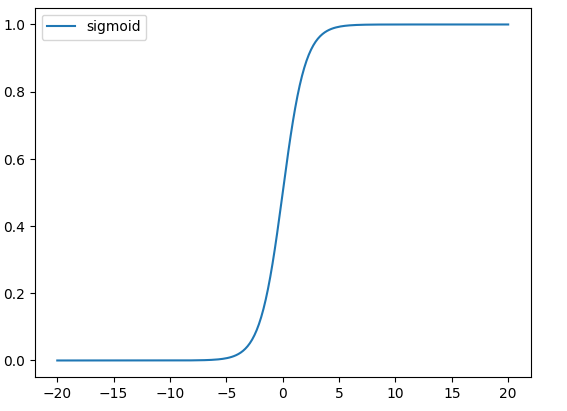
</center>
<br>
<br>


**Fonction de perte d'entropie croisée**

Dans la classification binaire, nous ne pouvons avoir qu'une des deux valeurs pour les cibles. L'utilisation de l'erreur quadratique moyenne comme avant ne fonctionne généralement pas bien dans la régression logistique. La fonction de perte la plus courante qui fonctionne le mieux pour les problèmes de régression logistique est la <font color='red'>fonction de perte d'entropie croisée</font> définie comme suit :
<br>
<center>
 $$ -y_i \log(p_i) - (1-y_i) \log (1-p_i),$$
</center>
où $p_i = \sigma (z)$ avec $z$ étant la sortie de notre fonction modèle.
<br>

**Tâche de code :**
1. Implémentez la fonction d'activation sigmoïde.
2. Implémentez la fonction de perte d'entropie croisée.


In [ ]:
def sigmoid(x):
    """fonction sigmoïde 1/1+e^-x"""

    prob = ... # mettez-moi à jour

    return prob

In [ ]:
# @title Exécutez-moi pour tester votre code
def test_sigmoid_fn():
  x  = np.array([0.7, 0.3, 0.8, 0.2])
  assert jnp.allclose(sigmoid(x), jax.nn.sigmoid(x)), "Le test a échoué !"
  print("Bien ! Votre réponse semble correcte !")

  return

In [ ]:
# @title solution sigmoïde (essayez de ne pas regarder avant d'avoir bien essayé !)
def sigmoid(x):
  prob = 1/(1+jnp.exp(-x))

  return prob

In [ ]:
def cross_entropy_loss(predictions, targets):
    # assurez-vous de ne jamais avoir log(0)

    # utilisez la sigmoïde pour calculer les probabilités (probs) à partir des prédictions
    probs = ... # mettez-moi à jour

    # votre code ici
    loss = ... # mettez-moi à jour

    return loss

In [ ]:
# @title Exécutez-moi pour tester votre code
def test_cross_entropy_loss():
  predictions = np.array([0.7, 0.3, 0.8, 0.2])
  targets = np.array([1, 0, 1, 0])

  # Perte d'entropie croisée (expected_loss) attendue pour les données de test
  expected_loss = 0.60669523

  # Calculez la perte d'entropie croisée en utilisant la fonction implémentée
  computed_loss = cross_entropy_loss(predictions, targets)

  assert jnp.isclose(computed_loss, expected_loss), "Le test a échoué !"

  # Si l'instruction assert ne soulève pas d'exception, le test est réussi.
  print("Bien ! Votre réponse semble correcte")

  return

test_cross_entropy_loss()

In [ ]:
# @title Solution de perte d'entropie croisée (essayez de ne pas regarder avant d'avoir bien essayé !)
def cross_entropy_loss(preds, targets):
    eps = 1e-15
    probs = sigmoid(preds)

    loss = -targets*jnp.log(probs+eps) - (1-targets)*jnp.log(1-probs+eps)

    return jnp.mean(loss)

#### Extension à une classification multi-classes

Dans une classification multi-classes, le modèle d'apprentissage machine (ML) est conçu pour gérer plus de deux classes, chaque classe représentant une catégorie ou un libellé différent. Par exemple, dans le cas d'un classificateur de chiffres, il y a 10 classes, chacune correspondant à un chiffre de 0 à 9.

La sortie du modèle est généralement une distribution de probabilités sur toutes les classes possibles, chaque classe étant associée à une probabilité. Les dimensions du vecteur de sortie correspondent au nombre de classes. Ainsi, pour un classificateur comportant 3 classes différentes, le vecteur de sortie aura une dimension de 3.

Pour faire une prédiction, le modèle sélectionne la classe ayant la probabilité la plus élevée comme classe prédite pour le point de données d'entrée.


**Encodage à chaud**

L'encodage à chaud est une technique courante utilisée pour représenter des variables catégorielles, telles que des libellés de classe, sous forme de vecteurs binaires. Dans le cas d'une classification multi-classes avec 3 classes, les cibles sont transformées en vecteurs encodés à chaud comme suit :

Classe 1 : [1, 0, 0] : cela signifie que le point de données appartient à la classe 1, et le premier élément du vecteur est défini à 1, tandis que les autres éléments sont définis à 0.

Classe 2 : [0, 1, 0] : cela signifie que le point de données appartient à la classe 2, et le deuxième élément du vecteur est défini à 1, tandis que les autres éléments sont définis à 0.

Classe 3 : [0, 0, 1] : cela signifie que le point de données appartient à la classe 3, et le troisième élément du vecteur est défini à 1, tandis que les autres éléments sont définis à 0.

Nous pouvons utiliser la fonction `jax.nn.one_hot` pour encoder à chaud nos données.


In [ ]:
# Un exemple d'utilisation de l'encodage à chaud
num_classes =  3
targets = jnp.array([2, 0, 1])
one_hot_targets = jax.nn.one_hot(targets, num_classes)
print(f"Exemple d'encodages à chaud : {one_hot_targets}")

**Exercice**: discutez avec votre voisin de la manière dont nous devrions définir la fonction de perte dans le cas d'une classification multi-classes.

**Solution **: la fonction de perte pour une classification multiple est calculée de la même manière que celle d'un classificateur binaire. Cependant, dans ce cas, nous définissons la perte comme la somme de la perte pour chacune des classes individuelles.
<br>
<center>
 $$ \sum_c -y^c_i \log(p^c_i),$$
</center>
où $p^c_i = \text{softmax}(z) = \frac{e^{z^c_i}}{\sum_c e^{z^c_i}}$ avec $z$ étant la sortie de notre fonction modèle.
<br>
La principale différence ici est que nous utilisons une fonction d'activation $\text{softmax}$ au lieu de $\text{sigmoid}$ comme dans le cas binaire.

**Exercice 3 [FACULTATIF] **: comprenez-vous intuitivement pourquoi cette formule est similaire à celle du cas binaire ?

**Solution **: faites défiler jusqu'à l'[annexe](#scrollTo=fRYbQvz01Zlm).

**Tâche de code **:
  1. Implémentez la fonction d'activation softmax
  2. Implémentez une fonction de perte d'entropie croisée pour la classification multi-classes en utilisant softmax et l'encodage à chaud.

In [ ]:
def softmax(logits):
  """Calculez softmax : `exp(x)/sum(exp(x))`

  Args :
    logits : tableau de forme (num_samples, num_classes)

  Retour :
    probs : tableau de forme (num_samples, num_classes)
  """

  # votre code ici
  # assurez-vous de faire la somme sur le bon axe

  probs = ... # mettez-moi à jour

  return probs

In [ ]:
# @title Exécutez-moi pour tester votre code
def test_softmax():
  x = jnp.array([[1.0, 0.4, 0.3], [10.0, 4.6, 8.9]])
  assert jnp.allclose(softmax(x), jax.nn.softmax(x, axis=-1))
  print("Bien ! Votre réponse semble correcte.")

test_softmax()

In [ ]:
# @title solution softmax (essayez de ne pas regarder avant d'avoir bien essayé !)
def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

In [ ]:
def cross_entropy_softmax_loss(predictions, targets):
    """Calculez la fonction de perte d'entropie croisée softmax

      Args :
        predictions : (num_samples, num_classes)
        targets : (num_samples)
    """

    # Calculez les probabilités softmax
    probs = ... # mettez-moi à jour

    num_classes = ... # mettez-moi à jour

    # Encodez à chaud les cibles
    targets_one_hot = ... # mettez-moi à jour

    # Calculez la perte d'entropie croisée
    eps = 1e-15
    probs += eps # pour éviter d'appeler log avec des valeurs nulles

    loss = ... # mettez-moi à jour

    return loss

In [ ]:
# @title Exécutez-moi pour tester votre code
def test_cross_entropy_softmax_loss():
  # Prédictions fixes (logits) pour chaque classe
  predictions = jnp.array([[1.5, 0.3, 2.7],
        [0.8, 1.2, 3.1], [2.3, 1.7, 0.5],
        [3.0, 0.5, 1.2], [0.2, 2.8, 1.0]])

  # Véritables libellés de classe fixes
  targets = jnp.array([2, 1, 0, 0, 2])

  # Perte attendue calculée manuellement
  expected_loss = 1.0456787

  # Calculez la perte d'entropie croisée softmax en utilisant votre implémentation
  loss = cross_entropy_softmax_loss(predictions, targets)

  # Vérifiez si la perte calculée correspond à la perte intégrée de JAX
  assert jnp.allclose(loss, expected_loss), "Les valeurs de perte ne correspondent pas !"

  print("Bien ! Votre réponse semble correcte.")

test_cross_entropy_softmax_loss()

In [ ]:
# @title Solution d'entropie croisée softmax (essayez de ne pas regarder avant d'avoir bien essayé !)
def cross_entropy_softmax_loss(predictions, targets):
    """Calculez la fonction de perte d'entropie croisée softmax

      Args :
        predictions : (num_samples, num_classes)
        targets : (num_samples)
    """

    # Calculez les probabilités softmax
    probs = softmax(predictions) # mettez-moi à jour

    num_classes = predictions.shape[-1]

    # Encodez à chaud les cibles
    targets_one_hot = jax.nn.one_hot(targets, num_classes) # mettez-moi à jour

    # Calculez la perte d'entropie croisée
    eps = 1e-15
    probs += eps # pour éviter d'appeler log avec des valeurs nulles

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1) # mettez-moi à jour

    return jnp.mean(loss_i)

#### Construction d'un réseau neuronal simple pour la classification

Dans cette section, nous allons assembler toutes les pièces et entraîner un réseau de neurones profond pour la classification. Rappelons tous les outils mentionnés initialement qui sont nécessaires pour entraîner un modèle d'apprentissage machine.

1. Jeu de données : nous devons disposer d'un jeu de données que nous diviserons en jeux d'entraînement et de validation dans un rapport de 80 : 20.
2. Une fonction de modèle.
3. Une fonction de perte.
4. Un algorithme d'optimisation.

Nous allons charger les données à l'aide de [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html). Nous n'avons pas abordé le prétraitement des données, mais en pratique, nous devons généralement prétraiter nos jeux de données avant de les utiliser pour l'entraînement. Ces étapes peuvent inclure, par exemple, la visualisation des données pour un aperçu, l'identification des valeurs aberrantes, la transformation et même l'abandon de certaines caractéristiques.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import jax
import jax.numpy as jnp
from typing import NamedTuple, Any

import matplotlib.pyplot as plt
import numpy as np

# Adaptons à nouveau notre fonction de descente de gradient par lots
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Implémentation de base de la descente de gradient par lots avec Jax.

  Args :
    loss_fn
      la fonction de perte pour notre modèle.
    params :
      les paramètres initiaux du modèle.
    training_data
      un tuple contenant les caractéristiques et les cibles pour l'entraînement.
    val_data
      un tuple contenant les caractéristiques et les cibles pour la validation.
    learning_rate
      taux d'apprentissage
    num_epochs
      nombre d'époques
    batch_size :
      taille de chaque mini lot
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Créez une liste vide pour stocker la perte d'entraînement et de validation.
  loss_train = [] # perte d'entraînement
  loss_val  = [] # perte de validation

  # Définissez une fonction qui calcule la perte et les gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  for epoch in range(num_epochs):
    # Mélangez les données avant chaque époque
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]
      # Calculez la perte et les gradients à l'aide de value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Mettez à jour les paramètres
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

    # Nous devons transformer la liste en tableau avant d'appliquer jnp.mean
    mean_loss = jnp.mean(jnp.array(loss_train_epoch))
    loss_train.append(mean_loss)

    # Calculez la perte de validation à la fin de l'époque
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)

  # Tracez la perte d'entraînement et de validation
  epochs = range(1, num_epochs+1)
  plt.plot(epochs, loss_train, label='Perte d\'entraînement')
  plt.plot(epochs, loss_val, label='Perte de validation')
  plt.xlabel('Époque')
  plt.ylabel('Perte')
  plt.title('Perte d\'entraînement et de validation')
  plt.legend()

  # Affichez le graphique
  plt.show()

  return params

# Chargez le jeu de données mnist
def load_dataset(seed):
  mnist = fetch_openml(name='mnist_784', version=1, as_frame=False, parser='auto')
  # Extraire les données et les libellés
  images, labels = mnist.data, mnist.target

  # Ces images sont constituées de valeurs entières comprises entre 0 et 255,0
  # Nous mettons à l'échelle les images entre min et max de 1
  x_max = 255.0
  x_min = 0.0

  images = (images - x_min)/(x_max - x_min)
  images = images.astype(jnp.float32)

**Tâche de code **:
1. Construisez un réseau neuronal qui produit des logits pour chacune des 10 classes.
2. Initialisez votre modèle avec une entrée fictive.
3. Définissez votre fonction d'entropie croisée softmax.

In [ ]:
# @title Votre code ici
class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # Première couche avec activation ReLU
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Deuxième couche
    x = ...  # mettez-moi à jour
    x = ...  # mettez-moi à jour

    # Troisième couche (sortie) sans activation appliquée
    x = nn.Dense(self.output_size)(x)

    return x

# transformez et initialisez le modèle.
seed = 32
input_size = 784 # n'oubliez pas que nos caractéristiques sont des images de forme 28x28 aplaties
hidden_size = ... # mettez-moi à jour
output_size = ... # mettez-moi à jour (indice : nombre de classes)

# instanciez le modèle
model = Network... # mettez-moi à jour

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)


def cross_entropy_softmax_loss(params, X, targets):
    """Calculez la fonction de perte d'entropie croisée softmax

      Args :
        params : paramètres du modèle
        X : tableau de caractéristiques (num_samples, num_features)
        targets : (num_samples)
    """

    # utilisez le modèle pour calculer les prédictions
    preds = model.apply(params, X)

    # Calculez les probabilités softmax
    probs = softmax(preds)

    num_classes = preds.shape[-1]

    # Encodez à chaud les cibles
    targets_one_hot = jax.nn.one_hot(targets, num_classes)

    # Calculez la perte d'entropie croisée
    eps = 1e-15
    probs += eps # pour éviter d'appeler log avec des valeurs nulles

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1)

    return jnp.mean(loss_i)

In [ ]:
# @title Solution d'exemple (essayez de ne pas regarder avant d'avoir bien essayé !)
class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # Première couche avec activation ReLU
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Deuxième couche
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Troisième couche (sortie) sans activation appliquée
    x = nn.Dense(self.output_size)(x)

    return x

# transformez et initialisez le modèle.
seed = 67
input_size = 784
hidden_size = 100
output_size = 10

# instanciez le modèle
model = Network(hidden_size, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

def cross_entropy_softmax_loss(params, X, targets):
    """Calculez la fonction de perte d'entropie croisée softmax

      Args :
        params : paramètres du modèle
        X : (num_features, num_classes)
        targets : (num_samples)
    """

    preds = model.apply(params, X)

    # Calculez les probabilités softmax
    probs = softmax(preds)

    num_classes = preds.shape[-1]

    # Encodez à chaud les cibles
    targets_one_hot = jax.nn.one_hot(targets, num_classes)

    # Calculez la perte d'entropie croisée
    eps = 1e-15
    probs += eps # pour éviter d'appeler log avec des valeurs nulles

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1)

    return jnp.mean(loss_i)


#### Entraîner le modèle






**Tâche de code **:
  1. Appelez la fonction `batch_gradient_descent` pour entraîner le modèle.
  2. Faites varier `learning_rate` et `batch_size` et observez le comportement de la fonction de perte.

In [ ]:
params = batch_gradient_descent ... # mettez-moi à jour

In [ ]:
# @title Solution d'exemple (essayez de ne pas regarder avant d'avoir bien essayé !)
params = batch_gradient_descent(cross_entropy_softmax_loss, initial_params, training_data, val_data, learning_rate=0.01, num_epochs=10, batch_size=1000)

#### Évaluation du modèle
Jusqu'à présent, la seule métrique que nous ayons utilisée pour évaluer les performances de notre modèle est la fonction de perte. Toutefois, lors de l'entraînement d'un modèle d'apprentissage automatique, plusieurs autres métriques peuvent être utilisées pour évaluer les performances du modèle. De plus, les hyperparamètres sont généralement sélectionnés (ajustés) en fonction de la métrique la plus importante que nous souhaitons optimiser. Vous trouverez ci-dessous quelques métriques pouvant être utilisées pour les tâches de classification.
*   **Précision **: il s'agit de la métrique la plus courante généralement utilisée dans la classification. Elle mesure la proportion d'instances correctement classées. $$ \text{Précision} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total de prédictions}}$$

* **Précision **: il s'agit d'une mesure du nombre de prédictions positives. Par exemple, si notre modèle prédit que 100 points de données appartiennent à la classe 1, la précision est le pourcentage de ces 100 points de données qui appartiennent effectivement à la classe 1. Une précision élevée est peut-être nécessaire par exemple dans le diagnostic médical, où nous ne voulons pas poser de diagnostic erroné chez les patients, ce qui entraînerait un traitement inutile.

* **Rappel **: il s'agit d'une mesure de la capacité du modèle à identifier efficacement toutes les instances positives. Par exemple, si le jeu de données comporte 100 points de données appartenant à la classe 1, combien sont effectivement classés comme appartenant à la classe 1 ? Le rappel est crucial dans les cas où nous ne voulons manquer aucune instance positive. Par exemple, si nous avons une société de sécurité, nous ne voulons pas classer à tort le signal d'un utilisateur comme étant sans danger alors qu'il est en réalité en danger.

**Jetons un coup d'œil à l'utilisation de la précision pour évaluer les performances de notre classificateur entraîné.**

Tout d'abord, définissons une fonction de prédiction qui transforme la sortie du modèle en classe. Rappelez-vous que la sortie du classificateur est logits qui correspondent à des probabilités non normalisées appartenant à chaque classe. Ainsi, la classe prédite est celle ayant la probabilité la plus élevée    

**Tâche de code **:
  1. Implémentez une fonction `model_predict` qui sélectionne la classe appropriée à partir de la sortie du modèle.

In [ ]:
# @title Votre code ici
def model_predict(params, X):
    """Utilisez le modèle pour la prédiction

      args :
        params : paramètres du modèle
        X : tableau de caractéristiques (num_samples, num_features)

      return
        pred : classe prédite (num_samples, 1)
    """

    # appelez le modèle pour calculer les logits
    logits = model... # mettez-moi à jour
    preds = ... # mettez-moi à jour : indice : utilisez jnp.argmax

    return preds

In [ ]:
# @title Exécutez pour tester votre code
def test_model_predict():
    features = val_data[0][0:10]
    preds = model_predict(params, features)
    expected = jnp.argmax(model.apply(params, features), axis=-1)
    assert jnp.array_equal(preds, expected), "Échec ! Réessayez !"
    print("Bien ! Votre réponse semble correcte.")

test_model_predict()

In [ ]:
# @title Solution de modèle de prédiction (essayez de ne pas regarder avant d'avoir bien essayé !)
def model_predict(params, X):
    """Utilisez le modèle pour la prédiction

      args :
        params : paramètres du modèle
        X : tableau de caractéristiques (num_samples, num_features)

      return
        pred : classe prédite (num_samples, 1)
    """

    # appelez le modèle pour calculer les logits
    logits = model.apply(params, X)
    preds = jnp.argmax(logits, axis=-1)

    return preds

In [ ]:
# @title Calculez la précision de votre modèle
def compute_accuracy(data):
  """Calculez la précision du modèle"""

  X, y_true = data
  y_pred = model_predict(params, X).squeeze()

  acc = sum(y_pred==y_true)/len(y_true)

  return acc

train_acc = compute_accuracy(training_data)
val_acc = compute_accuracy(val_data)
print(f"La précision d'entraînement est de {train_acc} tandis que la précision de validation est de {val_acc}")

Félicitations! Nous venons d'entraîner un modèle d'apprentissage automatique pour la classification à l'aide du célèbre jeu de données de chiffres mnist.

**Défi à emporter chez soi**:
- Êtes-vous satisfait de la précision de votre modèle?
- Que pouvez-vous faire pour améliorer la précision du modèle?

# **Conclusion**
**Résumé :**
- L'apprentissage automatique est la science qui utilise des données pour construire des systèmes intelligents.
- L'apprentissage profond est le sous-ensemble des méthodes d'apprentissage automatique qui utilise des réseaux neuronaux.
- L'optimisation est le processus de recherche des paramètres qui minimisent la perte d'une fonction.
- JAX est un nouveau framework populaire qui peut être utilisé pour calculer des dérivées et entraîner des modèles d'apprentissage automatique.
- JAX combine Autograd et XLA pour effectuer des calculs numériques **accélérés** 🚀. Ces calculs sont réalisés à l'aide de transformations telles que `jit`, `grad`, `vmap` et `pmap`.
- La fonction `grad` de JAX calcule automatiquement les gradients de vos fonctions !
- La descente de gradient est un algorithme efficace pour apprendre des modèles linéaires, mais aussi des modèles plus complexes, où des solutions analytiques n'existent pas.
- Nous devons faire attention à ne pas sur-apprendre ou sous-apprendre sur nos jeux de données.

**Étapes Suivantes :**

- Si vous souhaitez approfondir la régression linéaire, nous avons une section sur la régression linéaire bayésienne dans la [Pratique d'Apprentissage Profond Bayésien](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Bayesian_Deep_Learning_Prac.ipynb).
- Participez à d'autres tutoriels comme Math for Machine Learning, pour lequel nous avons également une version française.

**Références :**

Partie 1
1. Divers [documents JAX](https://jax.readthedocs.io/en/latest/) - en particulier le [démarrage rapide](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html), [erreurs courantes](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html), [jitting](https://jax.readthedocs.io/en/latest/jax-101/02-jitting.html#), [nombres aléatoires](https://jax.readthedocs.io/en/latest/jax-101/05-random-numbers.html) et [pmap](https://jax.readthedocs.io/en/latest/jax-101/06-parallelism.html?highlight=pmap#).
2. http://matpalm.com/blog/ymxb_pod_slice/
3. https://roberttlange.github.io/posts/2020/03/blog-post-10/
4. [Machine Learning with JAX - From Zero to Hero | Tutorial #1](https://www.youtube.com/watch?v=SstuvS-tVc0).

Partie 2
1. Certaines parties de cette section sont adaptées du [tutoriel de régression de Deepmind](https://github.com/deepmind/educational/blob/master/colabs/summer_schools/intro_to_regression.ipynb).
2. https://d2l.ai/chapter_linear-networks/linear-regression.html
3. https://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/slides/lec06-slides.pdf
4. [Chapitre Régression Linéaire - Livre Mathématiques pour l'Apprentissage Machine](https://mml-book.github.io/).

Partie 3
1. https://d2l.ai/chapter_linear-networks/linear-regression.html
2. https://jax.readthedocs.io/en/latest/notebooks/quickstart.html
3. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning

Pour d'autres pratiques de la Deep Learning Indaba, veuillez visiter [ici](https://github.com/deep-learning-indaba/indaba-pracs-2024).

# **Appendix:**



## Derivation of partial derivatives for exercise 2.4.

Derive $\frac{\partial \mathcal{L}}{\partial w}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial w} & = \frac{ \partial}{\partial w} (\frac{1}{2N} \sum_{i=1}^N (y_i - (w x_i + b))^2) \because{Definition of $\mathcal{L}$} \\
 \frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{2N} \frac{ \partial }{\partial w} ( \sum_{i=1}^N (y_i - (w x_i + b))^2) \because{Constant multiple rule} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{2N} \sum_{i=1}^N \frac{ \partial }{\partial w} (y_i - (w x_i + b))^2 \because{Sum Rule - derivative of sum is sum of derivatives.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{2N} \sum_{i=1}^N 2 (y_i - (w x_i + b)) \frac{ \partial }{\partial w}(y_i -(w x_i + b))  \because{Power Rule + Chain Rule.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{2N} \sum_{i=1}^N 2 (y_i - (w x_i + b)) (-x_i)  \because{Compute derative.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1(2)}{2N} \sum_{i=1}^N  (y_i - (w x_i + b)) (-x_i)  \because{Factor constant out of summation.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{N} \sum_{i=1}^N  -y_ix_i + (w x_i + b)x_i  \because{Multiply brackets and simplify.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{N} \sum_{i=1}^N  (-y_i + (w x_i + b))x_i  \because{Rewrite.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{N} \sum_{i=1}^N  ((w x_i + b) -y_i )x_i  \because{Rewrite.} \\
\frac{\partial \mathcal{L}}{\partial w} & = \frac{1}{N} \sum_{i=1}^N  (f(x_i) -y_i )x_i  \because{Substitute in $f(x_i)$.} \\  
\end{aligned}

Derive $\frac{\partial \mathcal{L}}{\partial b}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial b} & = \frac{ \partial}{\partial b} (\frac{1}{2N} \sum_{i=1}^N (y_i - (w x_i + b))^2) \because{Definition of $\mathcal{L}$} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{2N} \frac{ \partial }{\partial b} ( \sum_{i=1}^N (y_i - (w x_i + b))^2) \because{Constant multiple rule} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{2N} \sum_{i=1}^N \frac{ \partial }{\partial b} (y_i - (w x_i + b))^2 \because{Sum Rule - derivative of sum is sum of derivatives.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{2N} \sum_{i=1}^N 2 (y_i - (w x_i + b)) \frac{ \partial }{\partial b}(y_i -(w x_i + b))  \because{Power Rule + Chain Rule.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{2N} \sum_{i=1}^N 2 (y_i - (w x_i + b)) (-1)  \because{Compute derative.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1(2)}{2N} \sum_{i=1}^N (y_i - (w x_i + b)) (-1)  \because{Factor constant out of summation.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{N} \sum_{i=1}^N (-y_i + (w x_i + b))  \because{Multiply brackets and simplify.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{N} \sum_{i=1}^N ((w x_i + b) -y_i )  \because{Rewrite.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{N} \sum_{i=1}^N (f(x_i) -y_i )  \because{Substitute in $f(x_i)$.} \\
\end{aligned}

# **Feedback**

<!--Please provide feedback that we can use to improve our practicals in the future.-->
Veuillez fournir des commentaires que nous pouvons utiliser pour améliorer nos travaux pratiques à l'avenir.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/WUpRupqfhFtbLXtN6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />